# Biomarker

# Packages

In [2]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import compress
from matplotlib.ticker import PercentFormatter
from datetime import timedelta
%matplotlib inline
holmusk = [sns.xkcd_rgb['dark blue'], sns.xkcd_rgb['royal blue'], sns.xkcd_rgb['electric blue'], sns.xkcd_rgb['dull blue'], sns.xkcd_rgb['teal green'], sns.xkcd_rgb['yellowy green'], sns.xkcd_rgb['lime green']]
sns.set_palette(holmusk)

# Dataset

In [3]:
sec_cli = pd.read_csv('../primary_care/ukb41199.csv', usecols=[0, 6409, 6410, 6411, 6412, 6381, 6382, 6383, 6384, 6299, 6300, 6301, 6302, 6369, 6370, 6371, 6372, 6355, 6356, 6357, 6358])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6302,6358,6372,6384,6412) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sec_cli.columns = ['eid', 'LDL1', 'LDL2', 'LDL1date', 'LDL2date','HDL1', 'HDL2', 'HDL1date', 'HDL2date','Creat1', 'Creat2', 'Creat1date', 'Creat2date', 'hba1c1', 'hba1c2','hba1c1date', 'hba1c2date', 'gluc1', 'gluc2', 'gluc1date', 'gluc2date']

In [5]:
records = pd.read_pickle('../primary_care/records.pkl')

In [6]:
pri_cli = pd.read_csv('../primary_care/gp_clinical.txt', sep = '\t', encoding='ISO-8859-1')

In [7]:
reg = pd.read_csv('../primary_care/ukb41199.csv', usecols=[0, 5, 6, 5288, 5289, 5290, 5299])

In [8]:
biomarker = pd.read_excel('../primary_care/biomarker.xlsx')

# Codes

In [129]:
biomarker_codes = {
    'LDL': {
        'read2': ['44P6.', '44PI.', '44dB.', '44d5.', '44D5.', '44R4.'],
        'read3': ['44P6.', 'XaEVs', 'Xalp4', '44R4.']
    },
    'HDL': {
        'read2': ['44P5.', '44PB.', '44PC.'],#, '44R3.'],
        'read3': ['44P5.', '44PB', '44PC']#, '44R3']

    },
    'TC':{
        'read2':['44OE.', '44P..', '44PJ.', '44PK.'],
        'read3':['XaIRd', 'XE2eD', 'XaJe9', 'XaLux']
    },
    'Hba1c': {
        'read2': ['42W4.'],
        'read3': ['XaJPJ']
    },
    'Creatinine': {
        'read2': ['44J3.', '44JF.', '4Q40.'],
        'read3': ['XE2q5', 'XaETQ', 'X771N']
    },
      'Glucose': {
        'read2': list(biomarker[biomarker['biomarker'] == 'glucose']['READV2_CODE']),
        'read3': list(biomarker[biomarker['biomarker'] == 'glucose']['READV3_CODE'])
        #'read2': ['44F..', '44GB.', '44g1.', '44f1.', '44g..',
         #          '44g0.', '44f0.', '44G3.', '44f..', '44F3.',
          #         '44G9.', '44G4.', '44G..', '44F1.', '44F7.',
           #        'R1057', '44g6.', '4Q80.', '44g4.', '44G2.',
            #       '44f6.', '44g2.', '44G1.'],
        #'read3': ['44g1.', 'XM0ly', '44f1.', '44f..', 'X772z', 
         #          '44U3.', '44U4.', 'XE26g', '44F1.', '44G2.',
          #         '44U1.']
    },
    'Postprandial': {
        'read2': list(biomarker[biomarker['biomarker'] == 'postprandial']['READV2_CODE']),
        'read3': list(biomarker[biomarker['biomarker']== 'postprandial']['READV3_CODE'])
    },
    'TSH':{
        'read2': ['442J.', '442..'],
        'read3': ['X77Wg', 'XE2wy']
    },
    'SBP': {
        'read2': ['246Y.', '246D.', '246E.', '246L.', '246d.',
                   '246Q.'],
        'read3': ['Xalwj', 'XaKFx', 'XaKjF', 'XaJ2E', 'XaF4L',
                   'XaF4O', 'XaF4K', 'XaF4F']
    },
    'DBP': {
        'read2': ['246A.', '246P.', '246R.', '246X.', '246c.'],
        'read3': ['Xalwk', 'XaF4S', 'XaKFw', 'XaKjG', 'XaJ2F',
                   'XaF4a', 'XaF4b', 'XaF4Z']    
    },
    'HeartRate': {
        'read2': ['24c..'],
        'read3': ['X773r', 'XaBHw', 'XaBhW']
    }
}



# Dataset specifying


In [90]:
records_full = records[(records['noRecords'] > 1) & (records['first_stroke_after_d'].isnull() == False) & (records['discrepancy'] == False)]

In [91]:
records_full.shape

(5541, 14)

In [92]:
patients = list(records_full['eid'].values)

## Revised records to include those without dates

In [12]:
#records['noRecordsRevised'] = [1 if x == 0 else x for x in records['noRecords']]

In [13]:
#records_new = records[(records['noRecordsRevised'] > 1) & (records['event_int'].isnull() == False)]

In [14]:
#patients_new = list(records_new['eid'])

In [93]:
#pri = pri_cli[pri_cli['eid'].isin(patients)].reset_index()
pri = pri_cli[pri_cli['eid'].isin(patients)].reset_index()

In [94]:
demo = reg[reg['eid'].isin(patients)].reset_index()

In [95]:
sec = sec_cli[sec_cli['eid'].isin(patients)].reset_index()

In [96]:
first_event = records_full[['eid', 'first_record_d']]

# Event Interval

In [413]:
int_temp = {
    'count': records_full['event_int'].count(),
    'mean': records_full['event_int'].mean(),
    'median': records_full['event_int'].median(),
    'stdev': records_full['event_int'].std(),
    'min': records_full['event_int'].min(),
    'max': records_full['event_int'].max(),
    'Kolmogorov-Smirnov': stats.kstest(records_full['event_int'], 'norm')[1]
    }

int_t = pd.DataFrame(int_temp, index=['values']).T
int_t

,values
count,5541.000000
mean,38.646872
median,2.398407
stdev,66.474952
min,0.000000
max,716.992135
Kolmogorov-Smirnov,0.000000


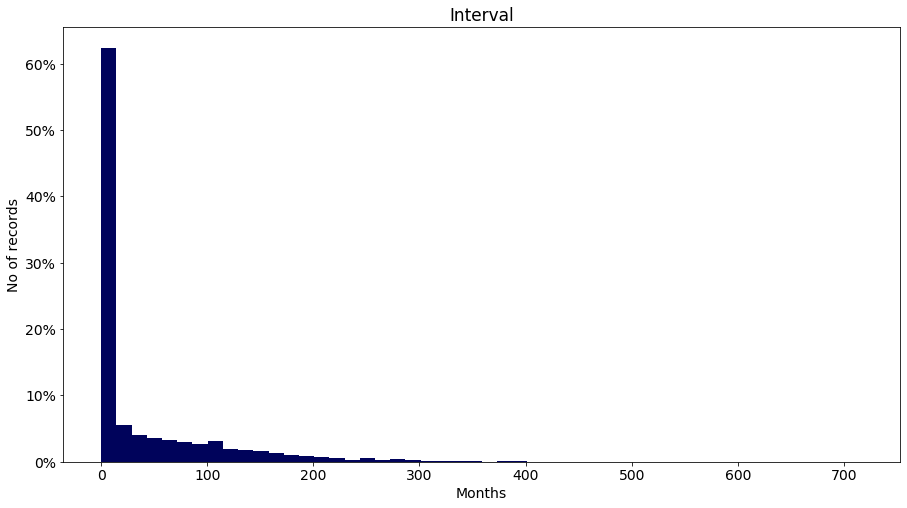

In [639]:
plt.figure(figsize = (15,8))
plt.title('Interval', size = 17)
plt.xlabel('Months', size = 14)
plt.ylabel('No of records', size = 14)
plt.hist(records_full['event_int'], bins = 50, weights= np.ones(records_full.shape[0]) / records_full['event_int'].shape[0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/interval.png')
plt.show()

# Demo

|Code|Ethnicity|
|---|---|
|1|White|
|2|Mixed|
|3|Asian| 
|4|Black|
|5|Chinese|
|6|Other|

In [415]:
demo.drop('index', axis = 1, inplace = True)

In [416]:
demo.columns = ['eid', 'gender', 'birthyear', 'ethnic1', 'ethnic2', 'ethnic3', 'ageat0']

In [417]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eid        5541 non-null   int64  
 1   gender     5541 non-null   float64
 2   birthyear  5541 non-null   float64
 3   ethnic1    5531 non-null   float64
 4   ethnic2    147 non-null    float64
 5   ethnic3    69 non-null     float64
 6   ageat0     5541 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 303.1 KB


## Ethnicity

In [418]:
demo['ethnic1'].value_counts()

 1001.0    4988
 1002.0     164
 1003.0     117
 3001.0      56
 4001.0      43
 3002.0      31
 6.0         29
 4002.0      24
-3.0         18
 2004.0      11
 3004.0       9
 2001.0       7
 3003.0       6
 5.0          6
 1.0          6
 2003.0       5
-1.0          4
 2002.0       3
 4003.0       2
 3.0          2
Name: ethnic1, dtype: int64

### Ethnicity features

In [420]:
demo['ethnic1'] = demo['ethnic1'].map(lambda x: str(int(x)) if str(x) != 'nan' else np.nan )

In [421]:
# create a black or not feature
demo['blackethn'] = [np.nan if type(x) == float else True if x[0] == '4' else False for x in demo['ethnic1']]

In [422]:
# ethnicity mapping 
demo['ethnicity'] = [np.nan if type(x) == float else 6 if x[0] == '6' else 5 if x[0] == '5' else 4 if x[0] == '4' else 3 if x[0] == '3' else 2 if x[0] == '2' else 1 if x[0] == '1' else np.nan for x in demo['ethnic1']]

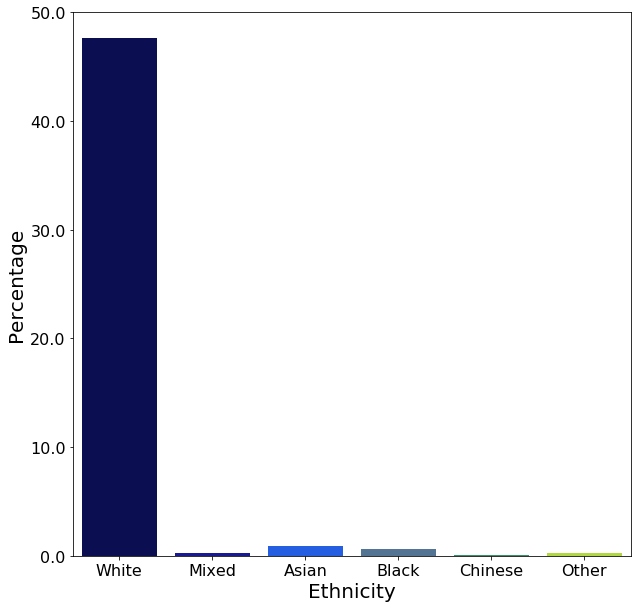

In [424]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = demo['ethnicity'], y = demo['ethnicity'], estimator= lambda x: len(x) * 100/ len(demo['ethnicity']))
ax.set_ylabel('Percentage', fontsize = 20)
ax.set_xlabel('Ethnicity', fontsize = 20)
ax.set_xticklabels(['White', 'Mixed', 'Asian', 'Black', 'Chinese', 'Other'], fontsize = 16)
ax.set_yticklabels(np.linspace(0,70, num=8), fontsize = 16)
ax.set_ylim(0, 100)
plt.savefig('../Results/Graphs/Exploration/ethnicity.png')

## Gender

|Gender| Code|
|---|---|
|Female| 0|
|Male|1|

In [425]:
demo['gender'].value_counts()

1.0    3554
0.0    1987
Name: gender, dtype: int64

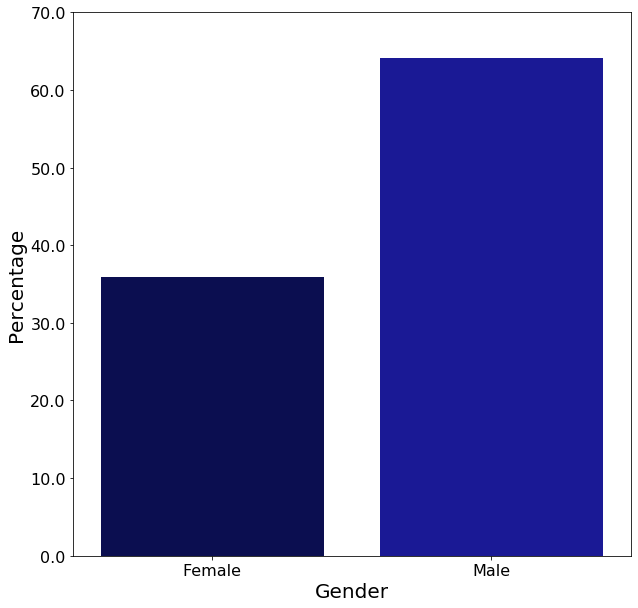

In [426]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = demo['gender'], y = demo['gender'], estimator= lambda x: len(x) * 100/ len(demo['gender']))
ax.set_ylabel('Percentage', fontsize = 20)
ax.set_xlabel('Gender', fontsize = 20)
ax.set_xticklabels(['Female', 'Male'], fontsize = 16)
ax.set_yticklabels(np.linspace(0,70, num=8), fontsize = 16)
ax.set_ylim(0, 70)
plt.savefig('../Results/Graphs/Exploration/gender.png')

## Age

In [643]:
records_full.describe()

,eid,noRecords,event_int,ageAtIndex
count,5.541000e+03,5541.000000,5541.000000,5541.000000
mean,3.533269e+06,3.914636,38.646872,60.103679
std,1.462787e+06,3.988988,66.474952,9.163963
min,1.000421e+06,2.000000,0.000000,7.507341
25%,2.263948e+06,2.000000,0.098565,54.295434
50%,3.554774e+06,3.000000,2.398407,61.000568
75%,4.799721e+06,4.000000,54.966221,66.925399
max,6.023832e+06,144.000000,716.992135,79.607384


In [640]:
records_full['ageAtIndex'] = (records_full['first_record_d'] - records_full['yr_birth'])/np.timedelta64(1, 'Y')

In [641]:
records_full.ageAtIndex.describe()

count    5541.000000
mean       60.103679
std         9.163963
min         7.507341
25%        54.295434
50%        61.000568
75%        66.925399
max        79.607384
Name: ageAtIndex, dtype: float64

In [429]:
records_plot = records_full[(records_full['discrepancy'] == False)].reset_index()

In [430]:
age_temp = {
    'count': records_plot['ageAtIndex'].count(),
    'mean': records_plot['ageAtIndex'].mean(),
    'median': records_plot['ageAtIndex'].median(),
    'stdev': records_plot['ageAtIndex'].std(),
    'min': records_plot['ageAtIndex'].min(),
    'max': records_plot['ageAtIndex'].max(),
    'Shapiro-Wilk P': stats.shapiro(records_plot['ageAtIndex'])[1]
    }

age_t = pd.DataFrame(age_temp, index=['values']).T
age_t

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,values
count,5.541000e+03
mean,6.010368e+01
median,6.100057e+01
stdev,9.163963e+00
min,7.507341e+00
max,7.960738e+01
Shapiro-Wilk P,2.024892e-29


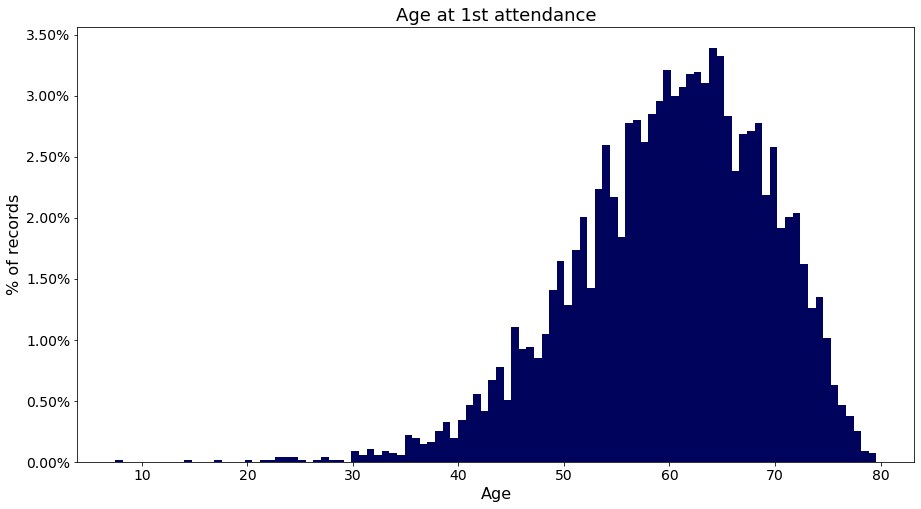

In [431]:
plt.figure(figsize = (15,8))
plt.hist(records_plot['ageAtIndex'], bins = 100, weights= np.ones_like(records_plot['ageAtIndex'].index) / records_plot['ageAtIndex'].count())
plt.title('Age at 1st attendance', size = 18)
plt.xlabel('Age', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/age.png')
plt.show()

# LDL

In [97]:
LDL = pri[pri['read_2'].isin(biomarker_codes['LDL']['read2'])| pri['read_3'].isin(biomarker_codes['LDL']['read3'])]

## Changing units

In [98]:
LDL['value3'] = LDL['value3'].replace('mmol/l', 'mmol/L')

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
LDL.value3.unique()

array([nan, 'MEA096', 'MEA000', 'mmol/L', 'Unknown', 'MEA151'],
      dtype=object)

## Changing to one value column

In [100]:
def verify_float(x):
    try:
        x = float(x)
        if x > 0.0:
            return True
        else:
            return False
    except ValueError:
        return False

In [101]:
LDL['value'] = LDL.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
LDL['len'] = [len(x) for x in LDL['value']]

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
LDL['value'] = LDL['value'].map(lambda x: float(x[0]) if len(x) > 0 else np.nan)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Changing time to datetime

In [104]:
LDL['event_dt'] = pd.to_datetime(LDL['event_dt'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
new_LDL = pd.merge(LDL, first_event, how = 'left', on = 'eid')

## Primary baseline

In [106]:
new_LDL['before_event'] = new_LDL['event_dt'] <= new_LDL['first_record_d']

In [107]:
new_LDL['t_before_event'] = new_LDL['first_record_d'] - new_LDL['event_dt']

In [114]:
duplicated_event = new_LDL.groupby('eid').agg(list).reset_index()

In [122]:
duplicated_event['new'] = [list(set(x)) for x in duplicated_event['t_before_event']]

In [117]:
duplicated_event['newlen'] = [len(x) for x in duplicated_event['new']]

In [118]:
duplicated_event['len'] = [len(x) for x in duplicated_event['t_before_event']]

In [119]:
duplicated_event['difference'] = duplicated_event['len'] - duplicated_event['newlen']

In [123]:
duplicated_event[duplicated_event['difference'] >0]

,eid,index,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,len,first_record_d,before_event,t_before_event,new,newlen,difference
18,1025822,"[657809, 657812]","[3, 3]","[2002-12-08 00:00:00, 2002-12-08 00:00:00]","[nan, nan]","[44P6., 44R4.]","[0.000, 0.000]","[nan, nan]","[nan, nan]","[nan, nan]",2,"[2006-01-13 00:00:00, 2006-01-13 00:00:00]","[True, True]","[1132 days 00:00:00, 1132 days 00:00:00]",[1132 days 00:00:00],1,1
19,1028054,"[714935, 714936, 715026]","[3, 3, 3]","[2005-09-29 00:00:00, 2005-09-29 00:00:00, 200...","[nan, nan, nan]","[44P6., 44P6., 44P6.]","[1.300, 1.300, 1.200]","[nan, nan, nan]","[nan, nan, nan]","[1.3, 1.3, 1.2]",3,"[2005-02-20 00:00:00, 2005-02-20 00:00:00, 200...","[False, False, False]","[-221 days +00:00:00, -221 days +00:00:00, -63...","[-221 days +00:00:00, -635 days +00:00:00]",2,1
38,1048556,"[1204797, 1204798, 1204909, 1204910, 1204911, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[2003-12-16 00:00:00, 2003-12-16 00:00:00, 200...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[44P6., 44P6., 44P6., 44P6., 44P6., 44P6., 44P...","[6.100, 6.100, 6.000, 6.000, 6.000, 3.200, 3.3...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[6.1, 6.1, 6.0, 6.0, 6.0, 3.2, 3.3, 3.9, 3.5, ...",22,"[2005-07-25 00:00:00, 2005-07-25 00:00:00, 200...","[True, True, True, True, True, True, False, Fa...","[587 days 00:00:00, 587 days 00:00:00, 377 day...","[-1578 days +00:00:00, 587 days 00:00:00, -161...",19,3
66,1095732,"[2416632, 2416693, 2416735, 2416795, 2416837, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2003-12-29 00:00:00, 2004-11-18 00:00:00, 200...","[44P6., 44P6., 44P6., 44P6., 44P6., 44P6., 44P...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.500, 2.600, 2.700, 2.800, 1.800, 2.300, 2.7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3.5, 2.6, 2.7, 2.8, 1.8, 2.3, 2.7, 3.0, 3.0, ...",18,"[2004-02-12 00:00:00, 2004-02-12 00:00:00, 200...","[True, False, False, False, False, False, Fals...","[45 days 00:00:00, -280 days +00:00:00, -514 d...","[-2115 days +00:00:00, -2470 days +00:00:00, -...",17,1
78,1112656,"[2810331, 2810351, 2810352, 2810399, 2810470, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2001-05-12 00:00:00, 2002-06-03 00:00:00, 200...","[44P6., 44P6., 44P6., 44P6., 44P6., 44P6., 44P...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 3.700, 3.700, nan, 2.700, 2.700, 1.600, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 3.7, 3.7, nan, 2.7, 2.7, 1.6, 1.6, 1.9, ...",24,"[2011-10-06 00:00:00, 2011-10-06 00:00:00, 201...","[True, True, True, True, True, True, True, Tru...","[3799 days 00:00:00, 3412 days 00:00:00, 3412 ...","[2288 days 00:00:00, 3086 days 00:00:00, 907 d...",13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,5972050,"[122317582, 122317650, 122317651, 122317711, 1...","[2, 2, 2, 2, 2]","[2007-10-08 00:00:00, 2009-02-07 00:00:00, 200...","[44P6., 44P6., 44P6., 44PI., 44PI.]","[nan, nan, nan, nan, nan]","[4.06, 3.53, nan, 1.9, 1.8]","[nan, nan, nan, nan, nan]","[nan, mmol/L, nan, mmol/L, mmol/L]","[4.06, 3.53, nan, 1.9, 1.8]",5,"[2016-01-31 00:00:00, 2016-01-31 00:00:00, 201...","[True, True, True, False, False]","[3037 days 00:00:00, 2549 days 00:00:00, 2549 ...","[-215 days +00:00:00, 2549 days 00:00:00, 3037...",4,1
3819,5976178,"[122424551, 122424552, 122424594, 122424659, 1...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[2001-06-03 00:00:00, 2001-06-03 00:00:00, 200...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[44R4., 44R4., 44R4., 44R4., 44P6., 44P6., 44P...","[1.800, 1.800, 1.000, 1.900, 1.700, 1.600, 1.9...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.8, 1.8, 1.0, 1.9, 1.7, 1.6, 1.9, 1.7, 2.6, ..

In [108]:
LDL_pri_baseline = new_LDL[new_LDL['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [109]:
LDL_pri_baseline_min = LDL_pri_baseline.loc[LDL_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [110]:
LDL_pri_baseline_min['value3'].value_counts()

MEA096    66
mmol/L    47
MEA000    37
Name: value3, dtype: int64

## Creating new dataframes for plotting individual SI units

In [447]:
LDL_pri_baseline_norm = LDL_pri_baseline_min[LDL_pri_baseline_min['value3'] == "mmol/L"].reset_index().drop('index', axis = 1)

In [448]:
LDL_pri_baseline_MEA = LDL_pri_baseline_min[(LDL_pri_baseline_min['value3'] == "MEA096") | (LDL_pri_baseline_min['value3'] == "MEA000")].reset_index().drop('index', axis = 1)

In [449]:
LDL_pri_baseline_unk = LDL_pri_baseline_min[(LDL_pri_baseline_min['value3'] == "Unknown") | (LDL_pri_baseline_min['value3'].isnull() == True)].reset_index().drop('index', axis = 1)

### mmol/L

In [450]:
LDL_pri_baseline_norm

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,len,first_record_d,before_event,t_before_event
0,1081250,2,2015-03-06,44PI.,NaN,1.5,NaN,mmol/L,1.50,1,2015-04-10,True,35 days
1,1295627,2,2010-06-25,44P6.,NaN,2.8,NaN,mmol/L,2.80,1,2010-09-03,True,70 days
2,1477220,2,2010-01-18,44P6.,NaN,3.2,NaN,mmol/L,3.20,1,2011-05-04,True,471 days
3,1556406,2,2013-11-22,44PI.,NaN,4.3,NaN,mmol/L,4.30,1,2014-09-11,True,293 days
4,1736382,2,2012-07-11,44PI.,NaN,3.1,NaN,mmol/L,3.10,1,2015-09-23,True,1169 days
5,2169721,2,2015-06-19,44PI.,NaN,3.2,NaN,mmol/L,3.20,1,2016-01-26,True,221 days
6,2217335,2,2012-04-27,44PI.,NaN,3.4,NaN,mmol/L,3.40,1,2012-05-01,True,4 days
7,2304811,2,2016-01-13,44PI.,NaN,3.8,NaN,mmol/L,3.80,1,2016-03-06,True,53 days
8,2355912,2,2005-12-10,44P6.,NaN,2.6,NaN,mmol/L,2.60,1,2011-06-14,True,2012 days
9,2439156,2,2009-10-23,44P6.,NaN,3.1,NaN,mmol/L,3.10,1,2009-10-28,True,5 days


In [451]:
ldl_temp1 = {
    'count': LDL_pri_baseline_norm.shape[0],
    'mean': LDL_pri_baseline_norm['value'].mean(),
    'median': LDL_pri_baseline_norm['value'].median(),
    'stdev': LDL_pri_baseline_norm['value'].std(),
    'min': LDL_pri_baseline_norm['value'].min(),
    'max': LDL_pri_baseline_norm['value'].max(),
    'IQR': str(round(LDL_pri_baseline_norm['value'].quantile(q=0.75)-LDL_pri_baseline_norm['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(LDL_pri_baseline_norm['value'], 'norm')[1]
}

ldl_t1 = pd.DataFrame(ldl_temp1, index=['values']).T

ldl_t1

,values
count,47
mean,3.08766
median,3.02
stdev,1.11316
min,1.5
max,6.3
IQR,1.45
Kolmogorov-Smirnov,1.16877e-55


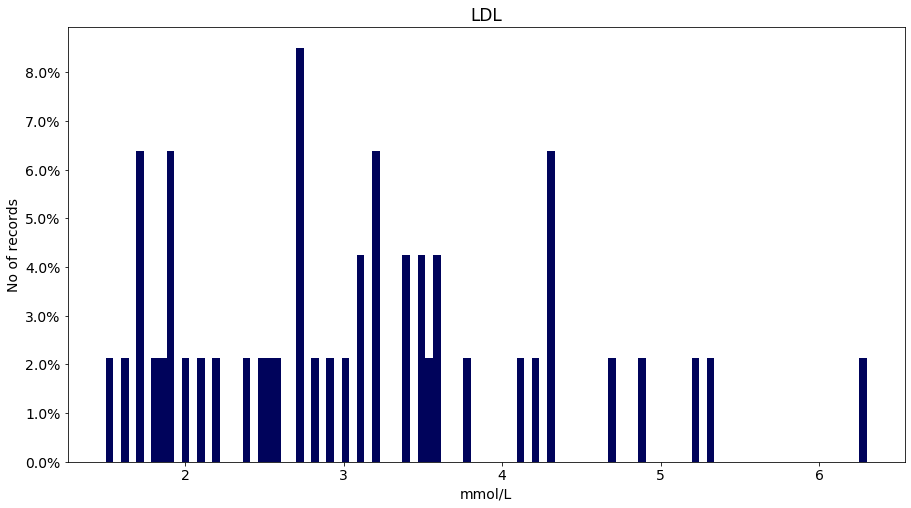

In [644]:
plt.figure(figsize = (15,8))
plt.title('LDL', size = 17)
plt.xlabel('mmol/L', size = 14)
plt.ylabel('No of records', size = 14)
plt.hist(LDL_pri_baseline_norm['value'], bins = 100, weights= np.ones(LDL_pri_baseline_norm.shape[0]) / LDL_pri_baseline_norm.shape[0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/LDL_baseline_mmol.png')
plt.show()

### MEA

In [453]:
ldl_temp2 = {
    'count': LDL_pri_baseline_MEA.shape[0],
    'mean': LDL_pri_baseline_MEA['value'].mean(),
    'median': LDL_pri_baseline_MEA['value'].median(),
    'stdev': LDL_pri_baseline_MEA['value'].std(),
    'min': LDL_pri_baseline_MEA['value'].min(),
    'max': LDL_pri_baseline_MEA['value'].max(),
    'IQR': str(round(LDL_pri_baseline_MEA['value'].quantile(q=0.75)-LDL_pri_baseline_MEA['value'].quantile(q=0.25), 2)),
    #'Kolmogorov-Smirnov': stats.kstest(LDL_baseline_MEA['value'], 'norm')[1]
}

ldl_t2 = pd.DataFrame(ldl_temp2, index=['values']).T

ldl_t2

,values
count,103
mean,2.97276
median,2.75
stdev,1.23312
min,1
max,7.4
IQR,1.78


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


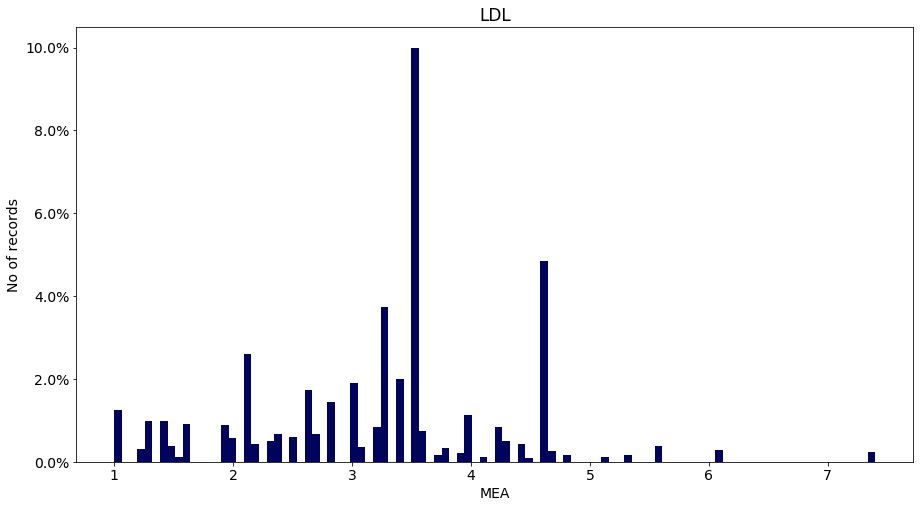

In [454]:
plt.figure(figsize = (15,8))
plt.title('LDL', size = 17)
plt.xlabel('MEA', size = 14)
plt.ylabel('No of records', size = 14)
plt.hist(LDL_pri_baseline_MEA['value'], bins = 100, weights= np.ones_like(LDL_pri_baseline_MEA.index) / (LDL_pri_baseline_MEA.index))
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(10))
plt.savefig('../Results/Graphs/Exploration/LDL_baseline_MEA.png')
plt.show()

### unknown

In [645]:
ldl_temp3 = {
    'count': LDL_pri_baseline_unk.shape[0],
    'mean': LDL_pri_baseline_unk['value'].mean(),
    'median': LDL_pri_baseline_unk['value'].median(),
    'stdev': LDL_pri_baseline_unk['value'].std(),
    'min': LDL_pri_baseline_unk['value'].min(),
    'max': LDL_pri_baseline_unk['value'].max(),
    'IQR': str(round(LDL_pri_baseline_unk['value'].quantile(q=0.75)-LDL_pri_baseline_unk['value'].quantile(q=0.25), 2)),
    #'Kolmogorov-Smirnov': stats.kstest(LDL_baseline_MEA['value'], 'norm')[1]
}

ldl_t3 = pd.DataFrame(ldl_temp3, index=['values']).T

ldl_t3

,values
count,1640
mean,3.14203
median,3.1
stdev,1.05765
min,0.116
max,7.5
IQR,1.4


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


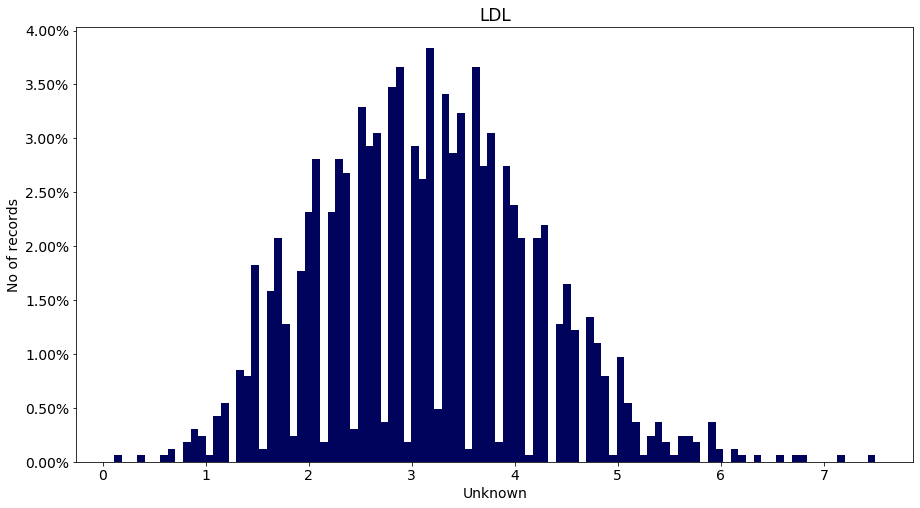

In [646]:
plt.figure(figsize = (15,8))
plt.title('LDL', size = 17)
plt.xlabel('Unknown', size= 14)
plt.ylabel('No of records', size = 14)
plt.hist(LDL_pri_baseline_unk['value'], bins = 100, weights= np.ones(LDL_pri_baseline_unk.shape[0]) / (LDL_pri_baseline_unk.shape[0]))
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/LDL_baseline_unk.png')
plt.show()

## Secondary Baseline

In [457]:
# secondary
LDL1 = sec[['eid', 'LDL1', 'LDL1date']]
LDL2 = sec[['eid', 'LDL2', 'LDL2date']]

In [458]:
LDL1.dropna(axis = 0, inplace = True)
LDL2.dropna(axis = 0, inplace = True)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [459]:
LDL1['LDL1date'] = pd.to_datetime(LDL1['LDL1date'])
LDL2['LDL2date'] = pd.to_datetime(LDL2['LDL2date'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [460]:
LDL1.columns = ['eid', 'LDL', 'date']
LDL2.columns = ['eid', 'LDL', 'date']

In [461]:
LDL1 = LDL1.append(LDL2)

In [462]:
LDL_sec = pd.merge(LDL1, first_event, on = 'eid', how = 'left')

In [463]:
LDL_sec['before_event'] = LDL_sec['date'] < LDL_sec['first_record_d']

In [464]:
LDL_sec['SI'] = 'mmol/L'

In [465]:
LDL_baseline_sec = LDL_sec[LDL_sec['before_event'] == True].reset_index()

### plot

In [466]:
ldl_temp4 = {
    'count': LDL_baseline_sec.LDL.count(),
    'mean': LDL_baseline_sec.LDL.mean(),
    'median': LDL_baseline_sec.LDL.median(),
    'stdev': LDL_baseline_sec.LDL.std(),
    'min': LDL_baseline_sec.LDL.min(),
    'max': LDL_baseline_sec.LDL.max(),
    'IQR': str(round(LDL_baseline_sec['LDL'].quantile(q=0.75)-LDL_baseline_sec['LDL'].quantile(q=0.25), 2))
}

ldl_t4 = pd.DataFrame(ldl_temp4, index=['values']).T
ldl_t4

,values
count,34
mean,73.7882
median,72.6
stdev,16.6171
min,45.6
max,132.4
IQR,22.0


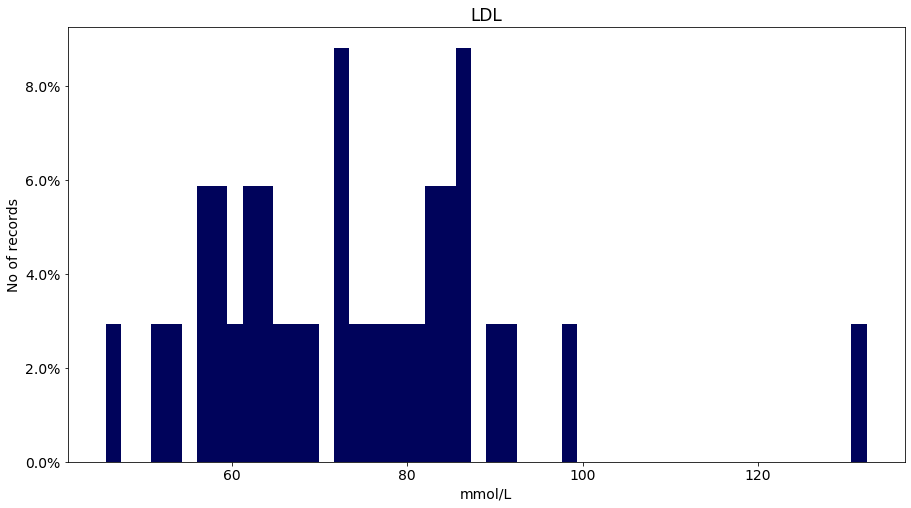

In [647]:
plt.figure(figsize = (15,8))
plt.title('LDL', size = 17)
plt.xlabel('mmol/L', size = 14)
plt.ylabel('No of records', size = 14)
plt.hist(LDL_baseline_sec.LDL, bins = 50, weights= np.ones(LDL_baseline_sec.shape[0]) / LDL_baseline_sec.shape[0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/LDL_baseline_sec.png')
plt.show()


# HDL
## Primary baseline

In [71]:
HDL = pri[pri['read_2'].isin(biomarker_codes['HDL']['read2'])| pri['read_3'].isin(biomarker_codes['HDL']['read3'])]

In [73]:
HDL.eid.nunique()

17919

## Combining values together

In [74]:
HDL['value'] = HDL.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
HDL['value'] = HDL['value'].map(lambda x: round(float(x[0]),1) if len(x) > 0 else np.nan)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
patients_new = HDL[HDL['value'].isnull() == False]['eid'].unique()

## Baseline

In [473]:
new_HDL = pd.merge(HDL, first_event, how = 'left', on = 'eid')

In [474]:
new_HDL['event_dt'] = pd.to_datetime(new_HDL['event_dt'])

In [475]:
new_HDL['before_event'] = new_HDL['event_dt'] < new_HDL['first_record_d']

In [476]:
new_HDL['t_before_event'] = new_HDL['first_record_d'] - new_HDL['event_dt']

In [477]:
HDL_pri_baseline = new_LDL[new_LDL['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [478]:
HDL_pri_baseline_min = HDL_pri_baseline.loc[HDL_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [479]:
HDL_pri_baseline_min

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,len,first_record_d,before_event,t_before_event
0,1001327,3,2015-04-21,NaN,44P6.,2.800,NaN,NaN,2.80,1,2016-03-28,True,342 days
1,1002251,3,2006-10-23,NaN,44P6.,4.200,NaN,NaN,4.20,1,2012-03-27,True,1982 days
2,1010923,3,2006-01-27,NaN,44P6.,3.600,NaN,NaN,3.60,1,2006-05-09,True,102 days
3,1013203,2,2014-02-21,44P6.,NaN,OPR003,1.80,MEA096,1.80,1,2014-02-24,True,3 days
4,1017966,3,2011-01-24,NaN,44P6.,3.500,NaN,NaN,3.50,1,2015-07-01,True,1619 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,6015854,3,2004-10-06,NaN,44P6.,2.900,NaN,NaN,2.90,1,2004-11-27,True,52 days
1786,6021143,3,2004-05-17,NaN,44P6.,5.540,NaN,NaN,5.54,1,2005-01-20,True,248 days
1787,6021968,4,2014-03-03,44P6.,NaN,2.500,NaN,NaN,2.50,1,2015-05-16,True,439 days
1788,6022686,3,2010-12-20,NaN,44P6.,1.800,NaN,NaN,1.80,1,2010-12-20,True,0 days


## Changing SI units

In [480]:
HDL_pri_baseline_min['value3'] = HDL_pri_baseline['value3'].replace('mmol/l', 'mmol/L')

In [481]:
HDL_pri_baseline_min['value3'].value_counts()

MEA096    43
MEA000    42
mmol/L    16
Name: value3, dtype: int64

## Creating the baseline SI dataframes

In [482]:
HDL_pri_baseline_norm = HDL_pri_baseline_min[HDL_pri_baseline_min['value3'] == "mmol/L"].reset_index().drop('index', axis = 1)

In [483]:
HDL_pri_baseline_MEA = HDL_pri_baseline_min[(HDL_pri_baseline_min['value3'] == "MEA096") | (HDL_pri_baseline_min['value3'] == "MEA000")].reset_index().drop('index', axis = 1)

In [484]:
HDL_pri_baseline_unk = HDL_pri_baseline_min[(HDL_pri_baseline_min['value3'].isnull() == True)].reset_index().drop('index', axis = 1)

In [485]:
HDL_pri_baseline_norm

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,len,first_record_d,before_event,t_before_event
0,1283028,1,2006-07-02,44P6.,NaN,2.000,NaN,mmol/L,2.0,1,2007-11-22,True,508 days
1,2186522,3,2006-04-10,NaN,44P6.,1.800,NaN,mmol/L,1.8,1,2007-01-25,True,290 days
2,2738803,3,2010-04-11,NaN,44P6.,3.900,NaN,mmol/L,3.9,1,2011-10-05,True,542 days
3,3062545,4,2013-05-09,44P6.,NaN,1.500,NaN,mmol/L,1.5,1,2013-07-25,True,77 days
4,3070205,3,1993-02-03,NaN,44R4.,0.000,NaN,mmol/L,NaN,0,1994-01-01,True,332 days
5,3076912,3,2007-10-31,NaN,XaEVs,0.000,NaN,mmol/L,NaN,0,2009-10-29,True,729 days
6,3319851,3,2011-09-08,NaN,44P6.,2.200,NaN,mmol/L,2.2,1,2013-03-16,True,555 days
7,3324183,3,2005-07-21,NaN,44P6.,2.900,NaN,mmol/L,2.9,1,2013-05-14,True,2854 days
8,4114457,3,2011-02-23,NaN,44P6.,3.500,NaN,mmol/L,3.5,1,2013-04-20,True,787 days
9,4307974,3,2012-02-11,NaN,44P6.,3.500,NaN,mmol/L,3.5,1,2012-07-05,True,145 days


## Plotting the SI units
### mmol/L 

In [648]:
hdl_temp1 = {
    'count': HDL_pri_baseline_norm.shape[0],
    'mean': HDL_pri_baseline_norm['value'].mean(),
    'median': HDL_pri_baseline_norm['value'].median(),
    'stdev': HDL_pri_baseline_norm['value'].std(),
    'min': HDL_pri_baseline_norm['value'].min(),
    'max': HDL_pri_baseline_norm['value'].max(),
    'IQR': str(round(HDL_pri_baseline_norm['value'].quantile(q=0.75)-HDL_pri_baseline_norm['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(HDL_pri_baseline_norm['value'], 'norm')[1]
}

hdl_t1 = pd.DataFrame(hdl_temp1, index=['values']).T

hdl_t1

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,16
mean,2.74615
median,2.9
stdev,0.803757
min,1.5
max,3.9
IQR,1.4
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


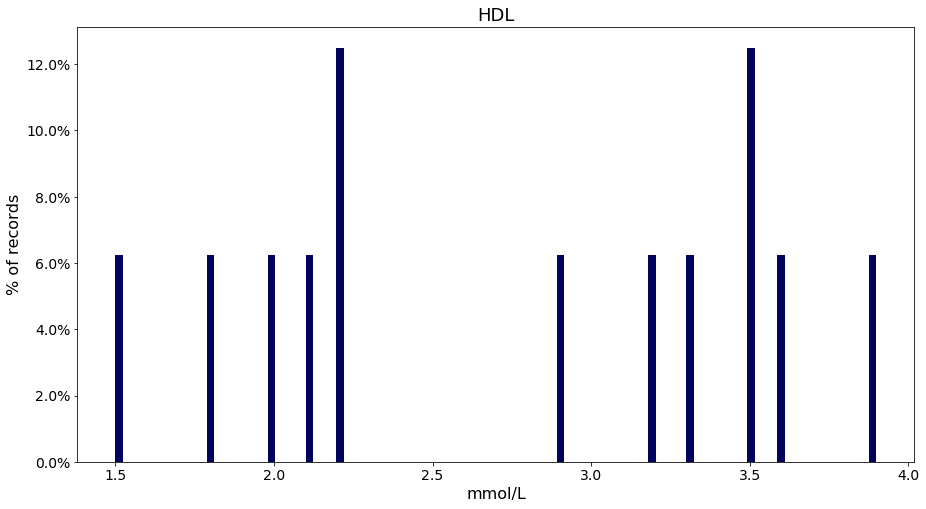

In [487]:
plt.figure(figsize = (15,8))
plt.hist(HDL_pri_baseline_norm['value'], bins = 100, weights= (np.ones(HDL_pri_baseline_norm.shape[0]) / HDL_pri_baseline_norm.shape[0]))
plt.title('HDL', size = 18)
plt.xlabel('mmol/L', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/HDL_pri_mmol.png')
plt.show()

### MEA

In [488]:
hdl_temp2 = {
    'count': HDL_pri_baseline_MEA.shape[0],
    'mean': HDL_pri_baseline_MEA['value'].mean(),
    'median': HDL_pri_baseline_MEA['value'].median(),
    'stdev': HDL_pri_baseline_MEA['value'].std(),
    'min': HDL_pri_baseline_MEA['value'].min(),
    'max': HDL_pri_baseline_MEA['value'].max(),
    'IQR': str(round(HDL_pri_baseline_MEA['value'].quantile(q=0.75)-HDL_pri_baseline_MEA['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(HDL_pri_baseline_MEA['value'], 'norm')[1]
}

hdl_t2 = pd.DataFrame(hdl_temp2, index=['values']).T

hdl_t2

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,85
mean,3.25393
median,3.2
stdev,1.06957
min,1.1
max,6.22
IQR,1.52
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


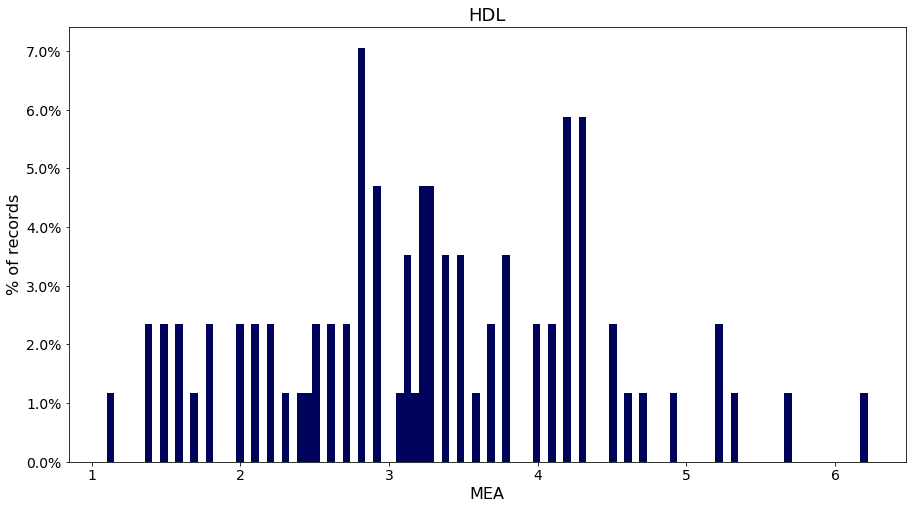

In [489]:
plt.figure(figsize = (15,8))
plt.hist(HDL_pri_baseline_MEA['value'], bins = 100, weights= np.ones(HDL_pri_baseline_MEA.shape[0]) / HDL_pri_baseline_MEA.shape[0])
plt.title('HDL', size = 18)
plt.xlabel('MEA', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/HDL_pri_mea.png')
plt.show()

### Unknown

In [490]:
hdl_temp3 = {
    'count': HDL_pri_baseline_unk.shape[0],
    'mean': HDL_pri_baseline_unk['value'].mean(),
    'median': HDL_pri_baseline_unk['value'].median(),
    'stdev': HDL_pri_baseline_unk['value'].std(),
    'min': HDL_pri_baseline_unk['value'].min(),
    'max': HDL_pri_baseline_unk['value'].max(),
    'IQR': str(round(HDL_pri_baseline_unk['value'].quantile(q=0.75)-HDL_pri_baseline_unk['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(HDL_pri_baseline_unk['value'], 'norm')[1]
}

hdl_t3 = pd.DataFrame(hdl_temp3, index=['values']).T

hdl_t3

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,1689
mean,3.12755
median,3.1
stdev,1.0715
min,0.116
max,7.5
IQR,1.46
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


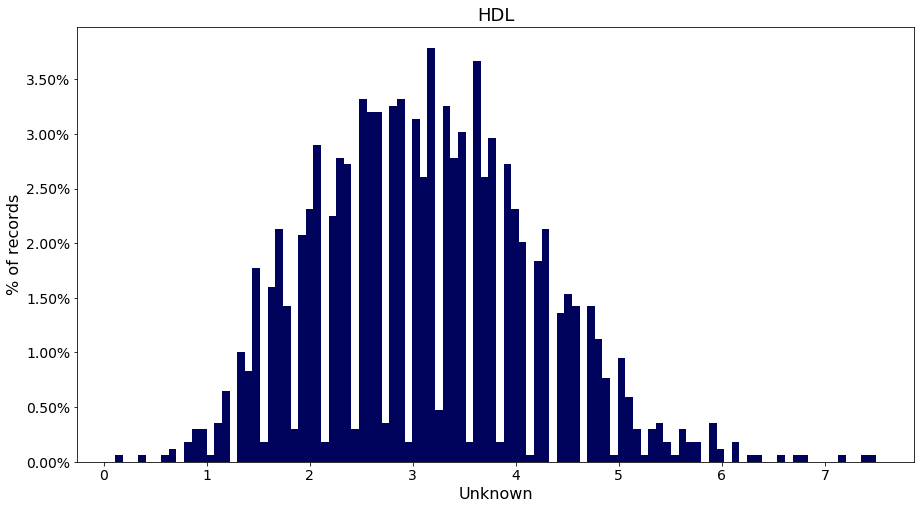

In [491]:
plt.figure(figsize = (15,8))
plt.hist(HDL_pri_baseline_unk['value'], bins = 100, weights= np.ones(HDL_pri_baseline_unk.shape[0]) / HDL_pri_baseline_unk.shape[0])
plt.title('HDL', size = 18)
plt.xlabel('Unknown', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/HDL_pri_unk.png')
plt.show()

## Secondary care

In [493]:
HDL1 = sec[['eid', 'HDL1', 'HDL1date']]
HDL2 = sec[['eid', 'HDL2', 'HDL2date']]

In [125]:
sec

,index,eid,LDL1,LDL2,LDL1date,LDL2date,HDL1,HDL2,HDL1date,HDL2date,...,Creat1date,Creat2date,hba1c1,hba1c2,hba1c1date,hba1c2date,gluc1,gluc2,gluc1date,gluc2date
0,41,1000421,88.7,NaN,2017-09-07,NaN,NaN,NaN,2017-09-07,NaN,...,2016-03-03,NaN,NaN,NaN,2017-09-07,NaN,4.461,NaN,2017-09-07,NaN
1,52,1000530,76.4,NaN,2016-12-05,NaN,5.539,NaN,2016-12-05,NaN,...,2016-02-06,NaN,1.358,NaN,2016-12-05,NaN,3.305,NaN,2016-12-05,NaN
2,108,1001099,71.8,NaN,2016-10-14,NaN,5.087,NaN,2016-10-14,NaN,...,2016-04-06,NaN,1.775,NaN,2016-10-14,NaN,2.604,NaN,2016-10-14,NaN
3,131,1001327,79.7,NaN,2016-10-15,NaN,5.475,NaN,2016-10-15,NaN,...,2015-08-04,NaN,1.653,NaN,2016-10-15,NaN,4.586,NaN,2016-10-15,NaN
4,161,1001624,66.0,NaN,2016-03-05,NaN,4.990,NaN,2016-03-05,NaN,...,2017-05-18,NaN,1.272,NaN,2016-03-05,NaN,5.142,NaN,2016-03-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,502113,6021143,59.2,NaN,2016-04-08,NaN,NaN,NaN,2016-04-07,NaN,...,2016-02-09,NaN,NaN,NaN,2016-04-07,NaN,2.560,NaN,2016-04-07,NaN
5537,502195,6021968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5538,502267,6022686,61.8,NaN,2017-01-27,NaN,5.346,NaN,2017-01-27,NaN,...,2016-03-17,NaN,1.238,NaN,2017-01-27,NaN,3.127,NaN,2017-01-27,NaN
5539,502282,6022831,90.5,NaN,2017-03-16,NaN,4.601,NaN,2017-03-16,NaN,...,2015-06-27,NaN,1.297,NaN,2017-03-16,NaN,2.055,NaN,2017-03-16,NaN


In [494]:
HDL1.dropna(axis = 0, inplace = True)
HDL2.dropna(axis = 0, inplace = True)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [495]:
HDL1['HDL1date'] = pd.to_datetime(HDL1['HDL1date'])
HDL2['HDL2date'] = pd.to_datetime(HDL2['HDL2date'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [496]:
HDL1.columns = ['eid', 'HDL', 'date']
HDL2.columns = ['eid', 'HDL', 'date']

In [497]:
HDL1 = HDL1.append(HDL2)

In [498]:
HDL_sec = pd.merge(HDL1, first_event, on = 'eid', how = 'left')

### creating secondary care baseline

In [499]:
HDL_sec['before_event'] = HDL_sec['date'] < HDL_sec['first_record_d']

In [500]:
HDL_sec['t_before_event'] = HDL_sec['first_record_d'] - HDL_sec['date']

In [501]:
HDL_sec_baseline = HDL_sec[HDL_sec['t_before_event'] >= timedelta(days= 0)].reset_index().drop('index', axis =1)

In [502]:
HDL_sec_baseline_min = HDL_sec_baseline.loc[HDL_sec_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [503]:
HDL_sec_baseline_min['SI'] = 'mmol/L'

### Plotting

In [504]:
hdl_temp4 = {
    'count': HDL_sec_baseline_min.HDL.count(),
    'mean': HDL_sec_baseline_min.HDL.mean(),
    'median': HDL_sec_baseline_min.HDL.median(),
    'stdev': HDL_sec_baseline_min.HDL.std(),
    'min': HDL_sec_baseline_min.HDL.min(),
    'max': HDL_sec_baseline_min.HDL.max(),
    'IQR': str(round(HDL_sec_baseline_min['HDL'].quantile(q=0.75)-HDL_sec_baseline_min['HDL'].quantile(q=0.25), 2)),
    'Shapiro-Wilk P': stats.shapiro(HDL_sec_baseline_min.HDL)[1]
}

hdl_t4 = pd.DataFrame(hdl_temp4, index=['values']).T

hdl_t4

,values
count,24
mean,5.21708
median,5.104
stdev,0.774247
min,4.177
max,7.052
IQR,0.72
Shapiro-Wilk P,0.0108416


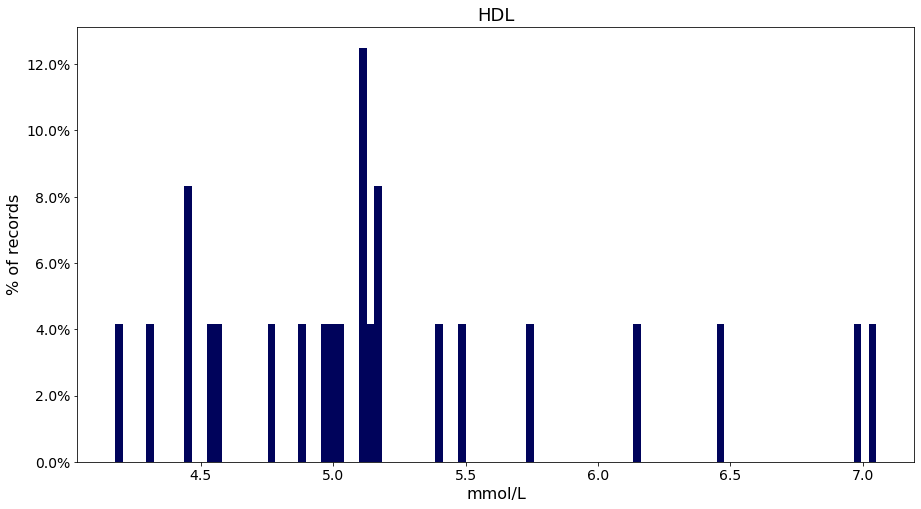

In [505]:
plt.figure(figsize = (15,8))
plt.hist(HDL_sec_baseline_min['HDL'], bins = 100, weights= np.ones(HDL_sec_baseline_min.shape[0]) / HDL_sec_baseline_min.shape[0])
plt.title('HDL', size = 18)
plt.xlabel('mmol/L', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/HDL_sec_baseline.png')
plt.show()

# Creatinine

In [88]:
creat = pri[pri['read_2'].isin(biomarker_codes['Creatinine']['read2'])| pri['read_3'].isin(biomarker_codes['Creatinine']['read3'])]

In [89]:
creat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279038 entries, 143 to 16427428
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          279038 non-null  int64 
 1   eid            279038 non-null  int64 
 2   data_provider  279038 non-null  int64 
 3   event_dt       279033 non-null  object
 4   read_2         98704 non-null   object
 5   read_3         180334 non-null  object
 6   value1         275192 non-null  object
 7   value2         17897 non-null   object
 8   value3         32115 non-null   object
dtypes: int64(3), object(6)
memory usage: 21.3+ MB


In [508]:
replace_dict= {
    'Âµmol/L': 'umol/L',
    'µmol/L': 'umol/L', 
    'micmol/l': 'umol/L',
    'umol/l': 'umol/L',
    'mmol/24h': 'mmol/24hr',
    'mmol/volume': 'mmol/vol',
    'm1/min': 'ml/min',
    'nmol/l': 'nmol/L',
    'mmol/l': 'mmol/L'
    }

In [509]:
creat['value3'] = creat['value3'].replace(replace_dict)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [510]:
creat['value'] = creat.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [511]:
creat['value'] = creat['value'].map(lambda x: round(float(x[0]),1) if len(x) > 0 else np.nan)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [512]:
creat.describe()

,index,eid,data_provider,value
count,7.972600e+04,7.972600e+04,79726.000000,78183.000000
mean,6.260505e+07,3.548641e+06,2.804104,287.142961
std,3.570355e+07,1.452037e+06,0.751881,4231.166037
min,1.045800e+04,1.000421e+06,1.000000,0.700000
25%,3.167687e+07,2.290674e+06,3.000000,74.000000
50%,6.383950e+07,3.602073e+06,3.000000,87.000000
75%,9.329110e+07,4.795329e+06,3.000000,104.000000
max,1.236040e+08,6.022831e+06,4.000000,166000.000000


## Baseline

In [513]:
new_creat = pd.merge(creat, first_event, how = 'left', on = 'eid')

In [514]:
new_creat['event_dt'] = pd.to_datetime(new_creat['event_dt'])

In [515]:
new_creat['before_event'] = new_creat['event_dt'] < new_creat['first_record_d']

In [516]:
new_creat['t_before_event'] = new_creat['first_record_d'] - new_creat['event_dt']

In [517]:
new_creat.head()

,index,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,first_record_d,before_event,t_before_event
0,10458,1000421,3,2005-09-12,NaN,XE2q5,102.000,NaN,NaN,102.0,2010-05-27,True,1718 days
1,10618,1000421,3,2010-03-26,NaN,XE2q5,86.000,NaN,NaN,86.0,2010-05-27,True,62 days
2,10784,1000421,3,2011-12-04,NaN,XE2q5,105.000,NaN,NaN,105.0,2010-05-27,False,-556 days
3,10825,1000421,3,2011-09-06,NaN,XE2q5,88.000,NaN,NaN,88.0,2010-05-27,False,-467 days
4,10836,1000421,3,2011-06-07,NaN,XE2q5,93.000,NaN,NaN,93.0,2010-05-27,False,-376 days


In [518]:
creat_pri_baseline = new_creat[new_creat['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [519]:
creat_pri_baseline_min = creat_pri_baseline.loc[creat_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

mg/mmol - albumin/creatinine ratio 

ml/min - creatinine clearance

In [520]:
creat_pri_baseline_min.value3.value_counts()

MEA142     99
umol/L     98
MEA000     44
Unknown     7
Name: value3, dtype: int64

## Creating new dataframes for plotting individual SI units

In [521]:
creat_pri_baseline_norm = creat_pri_baseline_min[creat_pri_baseline_min['value3'] == "umol/L"].reset_index().drop('index', axis = 1)

In [522]:
creat_pri_baseline_MEA = creat_pri_baseline_min[(creat_pri_baseline_min['value3'] == "MEA142") | (creat_pri_baseline_min['value3'] == "MEA000")].reset_index().drop('index', axis = 1)

In [523]:
creat_pri_baseline_unk = creat_pri_baseline_min[(creat_pri_baseline_min['value3'] == "Unknown") | (creat_pri_baseline_min['value3'].isnull() == True)].reset_index().drop('index', axis = 1)

## Plotting the SI units
### umol/L 

In [524]:
creat_temp1 = {
    'count': creat_pri_baseline_norm.shape[0],
    'mean': creat_pri_baseline_norm['value'].mean(),
    'median': creat_pri_baseline_norm['value'].median(),
    'stdev': creat_pri_baseline_norm['value'].std(),
    'min': creat_pri_baseline_norm['value'].min(),
    'max': creat_pri_baseline_norm['value'].max(),
    'IQR': str(round(creat_pri_baseline_norm['value'].quantile(q=0.75)-creat_pri_baseline_norm['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(creat_pri_baseline_norm['value'], 'norm')[1]
}

creat_t1 = pd.DataFrame(creat_temp1, index=['values']).T

creat_t1

,values
count,98
mean,78.5408
median,74
stdev,18.9063
min,38
max,160
IQR,21.0
Kolmogorov-Smirnov,0


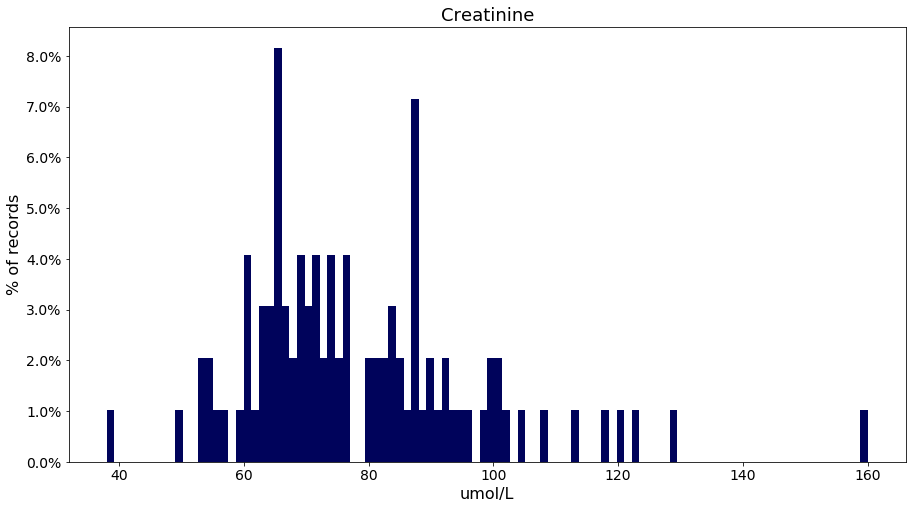

In [525]:
plt.figure(figsize = (15,8))
plt.hist(creat_pri_baseline_norm['value'], bins = 100, weights= (np.ones(creat_pri_baseline_norm.shape[0]) / creat_pri_baseline_norm.shape[0]))
plt.title('Creatinine', size = 18)
plt.xlabel('umol/L', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/creat_pri_umol.png')
plt.show()

### MEA

In [526]:
creat_temp2 = {
    'count': creat_pri_baseline_MEA.shape[0],
    'mean': creat_pri_baseline_MEA['value'].mean(),
    'median': creat_pri_baseline_MEA['value'].median(),
    'stdev': creat_pri_baseline_MEA['value'].std(),
    'min': creat_pri_baseline_MEA['value'].min(),
    'max': creat_pri_baseline_MEA['value'].max(),
    'IQR': str(round(creat_pri_baseline_MEA['value'].quantile(q=0.75)-creat_pri_baseline_MEA['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(creat_pri_baseline_MEA['value'], 'norm')[1]
}

creat_t2 = pd.DataFrame(creat_temp2, index=['values']).T

creat_t2

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,143
mean,84.0141
median,79
stdev,27.8384
min,45
max,320
IQR,25.0
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


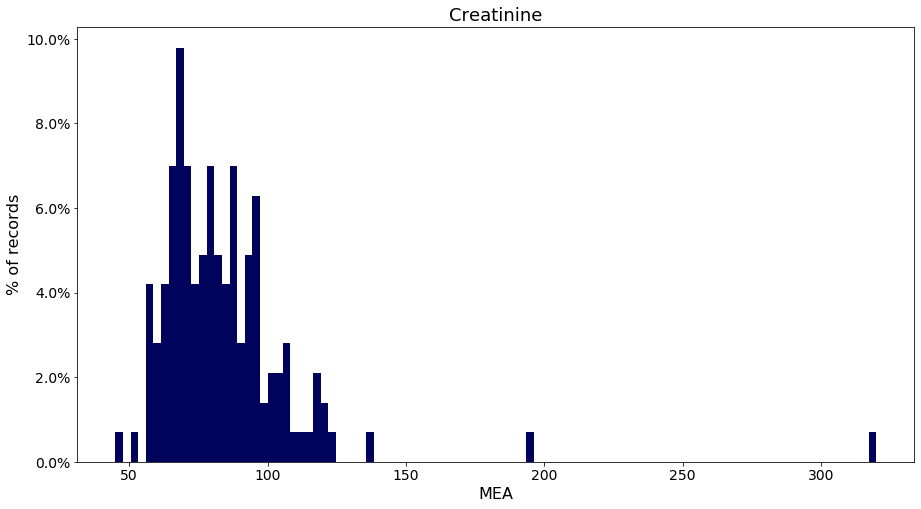

In [527]:
plt.figure(figsize = (15,8))
plt.hist(creat_pri_baseline_MEA['value'], bins = 100, weights= np.ones(creat_pri_baseline_MEA.shape[0]) / creat_pri_baseline_MEA.shape[0])
plt.title('Creatinine', size = 18)
plt.xlabel('MEA', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/creat_pri_mea.png')
plt.show()

### Unknown

In [528]:
creat_temp3 = {
    'count': creat_pri_baseline_unk.shape[0],
    'mean': creat_pri_baseline_unk['value'].mean(),
    'median': creat_pri_baseline_unk['value'].median(),
    'stdev': creat_pri_baseline_unk['value'].std(),
    'min': creat_pri_baseline_unk['value'].min(),
    'max': creat_pri_baseline_unk['value'].max(),
    'IQR': str(round(creat_pri_baseline_unk['value'].quantile(q=0.75)-creat_pri_baseline_unk['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(creat_pri_baseline_unk['value'], 'norm')[1]
}

creat_t3 = pd.DataFrame(creat_temp3, index=['values']).T

creat_t3

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,2282
mean,283.55
median,85
stdev,4020.43
min,24.2
max,102000
IQR,25.0
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


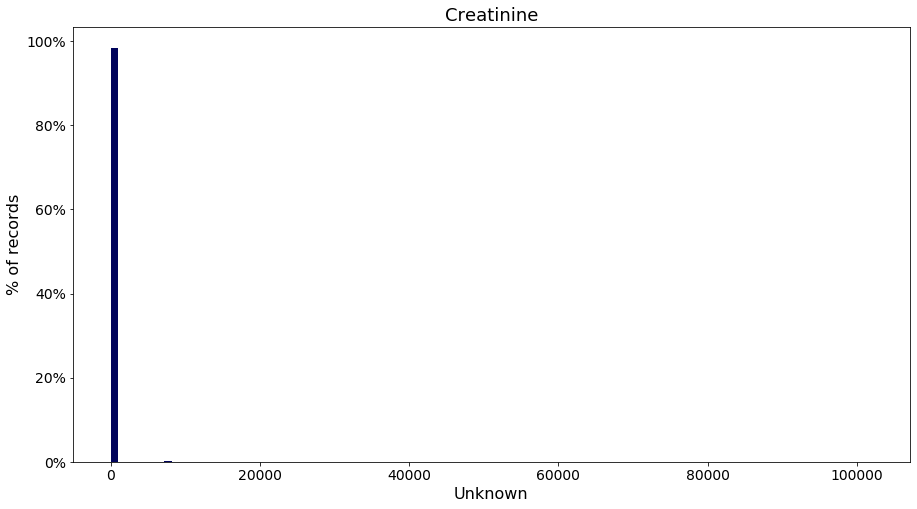

In [529]:
plt.figure(figsize = (15,8))
plt.hist(creat_pri_baseline_unk['value'], bins = 100, weights= np.ones(creat_pri_baseline_unk.shape[0]) / creat_pri_baseline_unk.shape[0])
plt.title('Creatinine', size = 18)
plt.xlabel('Unknown', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/creat_pri_unk.png')
plt.show()

### Unknown (outliers removed)

In [530]:
creat_pri_baseline_unk2 = creat_pri_baseline_unk[creat_pri_baseline_unk['value'] <= 500].reset_index().drop('index', axis = 1)

In [531]:
creat_temp4 = {
    'count': creat_pri_baseline_unk2.shape[0],
    'mean': creat_pri_baseline_unk2['value'].mean(),
    'median': creat_pri_baseline_unk2['value'].median(),
    'stdev': creat_pri_baseline_unk2['value'].std(),
    'min': creat_pri_baseline_unk2['value'].min(),
    'max': creat_pri_baseline_unk2['value'].max(),
    'IQR': str(round(creat_pri_baseline_unk2['value'].quantile(q=0.75)-creat_pri_baseline_unk2['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(creat_pri_baseline_unk2['value'], 'norm')[1]
}

creat_t4 = pd.DataFrame(creat_temp4, index=['values']).T

creat_t4

,values
count,2245
mean,87.4527
median,85
stdev,22.5471
min,24.2
max,412
IQR,25.0
Kolmogorov-Smirnov,0


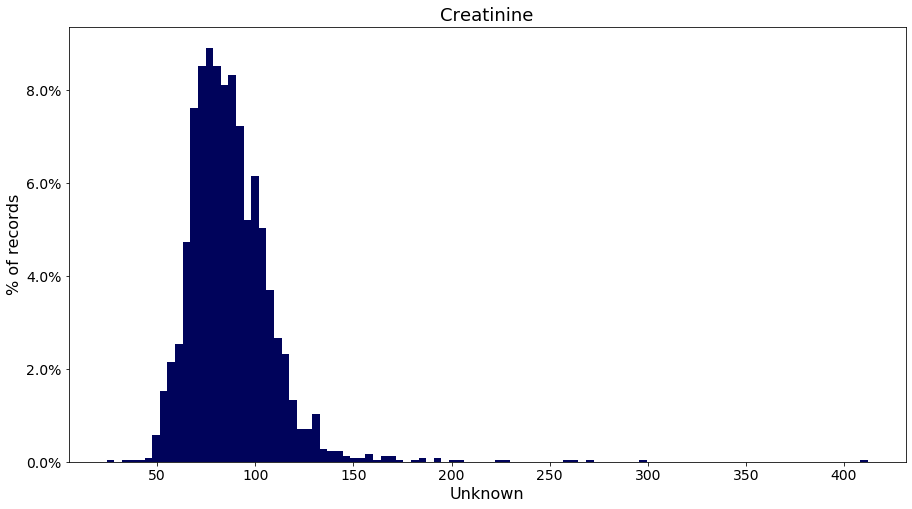

In [532]:
plt.figure(figsize = (15,8))
plt.hist(creat_pri_baseline_unk2['value'], bins = 100, weights= np.ones(creat_pri_baseline_unk2.shape[0]) / creat_pri_baseline_unk2.shape[0])
plt.title('Creatinine', size = 18)
plt.xlabel('Unknown', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/creat_pri_unk2.png')
plt.show()

## Secondary care

In [533]:
sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       5541 non-null   int64  
 1   eid         5541 non-null   int64  
 2   LDL1        5177 non-null   float64
 3   LDL2        126 non-null    float64
 4   LDL1date    5211 non-null   object 
 5   LDL2date    133 non-null    object 
 6   HDL1        4749 non-null   float64
 7   HDL2        107 non-null    float64
 8   HDL1date    5203 non-null   object 
 9   HDL2date    133 non-null    object 
 10  Creat1      5180 non-null   float64
 11  Creat2      106 non-null    float64
 12  Creat1date  5334 non-null   object 
 13  Creat2date  108 non-null    object 
 14  hba1c1      4756 non-null   float64
 15  hba1c2      107 non-null    float64
 16  hba1c1date  5211 non-null   object 
 17  hba1c2date  133 non-null    object 
 18  gluc1       5168 non-null   float64
 19  gluc2       126 non-null   

In [534]:
creat1 = sec[['eid', 'Creat1', 'Creat1date']]
creat2 = sec[['eid', 'Creat2', 'Creat2date']]

In [535]:
creat1.dropna(axis = 0, inplace = True)
creat2.dropna(axis = 0, inplace = True)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [536]:
creat1['Creat1date'] = pd.to_datetime(creat1['Creat1date'])
creat2['Creat2date'] = pd.to_datetime(creat2['Creat2date'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [537]:
creat1.columns = ['eid', 'creat', 'date']
creat2.columns = ['eid', 'creat', 'date']

In [538]:
creat1 = creat1.append(creat2)

In [539]:
creat_sec = pd.merge(creat1, first_event, on = 'eid', how = 'left')

### creating secondary care baseline

In [540]:
creat_sec['before_event'] = creat_sec['date'] < creat_sec['first_record_d']

In [541]:
creat_sec['t_before_event'] = creat_sec['first_record_d'] - creat_sec['date']

In [542]:
creat_sec_baseline = creat_sec[creat_sec['t_before_event'] >= timedelta(days= 0)].reset_index().drop('index', axis =1)

In [543]:
creat_sec_baseline_min = creat_sec_baseline.loc[creat_sec_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [544]:
creat_sec_baseline_min['SI'] = 'umol/L'

### Plotting

In [545]:
creat_temp5 = {
    'count': creat_sec_baseline_min.creat.count(),
    'mean': creat_sec_baseline_min.creat.mean(),
    'median': creat_sec_baseline_min.creat.median(),
    'stdev': creat_sec_baseline_min.creat.std(),
    'min': creat_sec_baseline_min.creat.min(),
    'max': creat_sec_baseline_min.creat.max(),
    'IQR': str(round(creat_sec_baseline_min['creat'].quantile(q=0.75)-creat_sec_baseline_min['creat'].quantile(q=0.25), 2)),
    'Shapiro-Wilk P': stats.shapiro(creat_sec_baseline_min.creat)[1]
}

creat_t5 = pd.DataFrame(creat_temp5, index=['values']).T

creat_t5

,values
count,271
mean,37.7572
median,36.2
stdev,8.70763
min,23.9
max,102.9
IQR,4.7
Shapiro-Wilk P,2.20737e-22


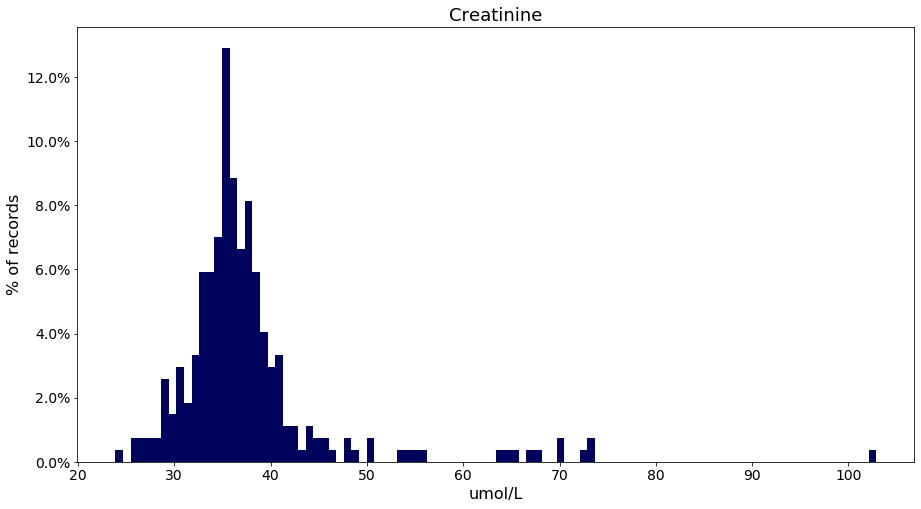

In [546]:
plt.figure(figsize = (15,8))
plt.hist(creat_sec_baseline_min['creat'], bins = 100, weights= np.ones(creat_sec_baseline_min.shape[0]) / creat_sec_baseline_min.shape[0])
plt.title('Creatinine', size = 18)
plt.xlabel('umol/L', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/creat_sec_baseline.png')
plt.show()

# eGFR

In [249]:
egfr = pri[pri['read_2'].isin(biomarker_codes['eGFR']['read2'])| pri['read_3'].isin(biomarker_codes['eGFR']['read3'])]

In [250]:
egfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 2699 to 4460665
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          418 non-null    int64 
 1   eid            418 non-null    int64 
 2   data_provider  418 non-null    int64 
 3   event_dt       418 non-null    object
 4   read_2         31 non-null     object
 5   read_3         387 non-null    object
 6   value1         415 non-null    object
 7   value2         0 non-null      object
 8   value3         0 non-null      object
dtypes: int64(3), object(6)
memory usage: 32.7+ KB


In [352]:
egfr.value3.unique()

array([nan], dtype=object)

In [353]:
calc_egfr = creat_spec

In [354]:
calc_egfr['mgdl'] = calc_egfr['concentration'] /88.42

In [355]:
egfr = pd.merge(calc_egfr, demo, how = 'left', on = 'eid')

In [356]:
c_egfr = egfr[egfr['gender'] >= 0]

In [357]:
c_egfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66337 entries, 0 to 66336
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          66337 non-null  int64  
 1   eid            66337 non-null  int64  
 2   data_provider  66337 non-null  int64  
 3   event_dt       66336 non-null  object 
 4   read_2         23517 non-null  object 
 5   read_3         42820 non-null  object 
 6   value1         66337 non-null  object 
 7   value2         4837 non-null   object 
 8   value3         8827 non-null   object 
 9   value          66337 non-null  float64
 10  concentration  66337 non-null  float64
 11  mgdl           66337 non-null  float64
 12  gender         66337 non-null  float64
 13  birthyear      66337 non-null  float64
 14  ethnic1        66288 non-null  object 
 15  ethnic2        1902 non-null   float64
 16  ethnic3        746 non-null    float64
 17  ageat0         66337 non-null  float64
 18  blacke

In [358]:
c_egfr['k'] = [61.9 if x == 0 else 79.6 for x in c_egfr['gender']]

In [360]:
egfr_eqn = []

for i in range(len(c_egfr['gender'])):
    sex = c_egfr.iloc[i]['gender']
    crt = c_egfr.iloc[i]['concentration']
    ethn = c_egfr.iloc[i]['blackethn']
    age = c_egfr.iloc[i]['ageat0']
    kappa = c_egfr.iloc[i]['k']

    # if black
    if ethn == True:
        # if female
        if sex == 0:
            # if crt <= kappa
            if crt <= kappa:
                gfr = 166 * ((crt/kappa) ** (-0.329))* ((0.993) ** age)
                egfr_eqn.append(gfr)
            # if crt > kappa
            else:
                gfr = 166 * ((crt/kappa) ** (-1.209)) * ((0.993) ** age)
                egfr_eqn.append(gfr)
        # if male
        else: 
            # if crt <= kappa
            if crt <= kappa:
                gfr =  163 * ((crt/kappa) ** (-0.411)) * ((0.993) ** age)
                egfr_eqn.append(gfr)
            # if crt > kappa
            else:
                gfr =  163 * ((crt/kappa) ** (-1.209)) * ((0.993) ** age)
                egfr_eqn.append(gfr)
    # if white or other
    else:
        # if female
        if sex == 0:
            # if crt <= kappa
            if crt <= kappa:
                gfr = 144 * ((crt/kappa) ** (-0.329))* ((0.993) ** age)
                egfr_eqn.append(gfr)
            # if crt > kappa
            else:
                gfr = 144 * ((crt/kappa) ** (-1.209)) * ((0.993) ** age)
                egfr_eqn.append(gfr)
        # if male
        else: 
            # if crt <= kappa
            if crt <= 0.9:
                gfr =  141 * ((crt/kappa) ** (-0.411)) * ((0.993) ** age)
                egfr_eqn.append(gfr)
            # if crt > kappa
            else:
                gfr =  141 * ((crt/kappa) ** (-1.209)) * ((0.993) ** age)
                egfr_eqn.append(gfr)

In [361]:
c_egfr['egfr'] = egfr_eqn

In [362]:
c_egfr[['concentration', 'mgdl', 'egfr', 'ageat0', 'blackethn', 'ethnicity', 'gender']]

,concentration,mgdl,egfr,ageat0,blackethn,ethnicity,gender
0,79.0,0.893463,90.134906,65.0,False,1.0,1.0
1,76.0,0.859534,94.454038,65.0,False,1.0,1.0
2,73.0,0.825605,99.166920,65.0,False,1.0,1.0
3,75.0,0.848224,95.978752,65.0,False,1.0,1.0
4,86.0,0.972631,81.342129,65.0,False,1.0,1.0
...,...,...,...,...,...,...,...
66332,55.0,0.622031,102.449256,54.0,False,1.0,0.0
66333,59.0,0.667270,100.110083,54.0,False,1.0,0.0
66334,60.0,0.678580,99.558048,54.0,False,1.0,0.0
66335,63.0,0.712508,96.465758,54.0,False,1.0,0.0


In [363]:
c_egfr[c_egfr['egfr'] > 200].describe()

,index,eid,data_provider,value,concentration,mgdl,gender,birthyear,ethnic2,ethnic3,ageat0,ethnicity,k,egfr
count,5.000000e+01,5.000000e+01,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,0.0,0.0,50.000000,50.0,50.000000,50.000000
mean,6.058557e+07,3.466860e+06,2.640000,25.32800,25.32800,0.286451,0.980000,1947.920000,NaN,NaN,59.880000,1.0,79.246000,1163.959500
std,3.635336e+07,1.478333e+06,0.562792,15.76176,15.76176,0.178260,0.141421,5.992649,NaN,NaN,5.902749,0.0,2.503158,2171.899089
min,1.042108e+07,1.427662e+06,2.000000,0.90000,0.90000,0.010179,0.000000,1939.000000,NaN,NaN,42.000000,1.0,61.900000,200.377820
25%,2.116754e+07,1.861901e+06,2.000000,7.60000,7.60000,0.085953,1.000000,1944.000000,NaN,NaN,59.000000,1.0,79.600000,211.074923
50%,5.385879e+07,3.198375e+06,3.000000,33.00000,33.00000,0.373219,1.000000,1947.000000,NaN,NaN,61.000000,1.0,79.600000,262.628778
75%,9.615544e+07,4.912844e+06,3.000000,40.00000,40.00000,0.452386,1.000000,1948.750000,NaN,NaN,63.000000,1.0,79.600000,1363.186695
max,1.219774e+08,5.959317e+06,4.000000,44.00000,44.00000,0.497625,1.000000,1967.000000,NaN,NaN,69.000000,1.0,79.600000,11101.510808


In [364]:
egfr_spec = c_egfr[c_egfr['egfr'] <= 200]

In [471]:
egfr_spec.describe()

,index,eid,data_provider,value,concentration,mgdl,gender,birthyear,ethnic2,ethnic3,ageat0,ethnicity,k,egfr
count,6.628700e+04,6.628700e+04,66287.000000,66287.000000,66287.000000,66287.000000,66287.000000,66287.000000,1902.000000,746.000000,66287.000000,65736.000000,66287.000000,66287.000000
mean,6.204585e+07,3.525863e+06,2.811170,90.681960,90.681960,1.025582,0.640427,1945.638149,911.910620,1001.123324,62.327862,1.103049,73.235562,75.640421
std,3.592723e+07,1.461147e+06,0.753948,24.728254,24.728254,0.279668,0.479879,5.888922,285.768943,0.478608,5.885348,0.537991,8.493855,20.482854
min,1.274400e+04,1.000530e+06,1.000000,7.500000,7.500000,0.084822,0.000000,1937.000000,-3.000000,1001.000000,40.000000,1.000000,61.900000,21.897633
25%,3.101801e+07,2.263476e+06,3.000000,73.000000,73.000000,0.825605,0.000000,1941.000000,1001.000000,1001.000000,60.000000,1.000000,61.900000,61.729856
50%,6.158485e+07,3.510806e+06,3.000000,87.000000,87.000000,0.983940,1.000000,1944.000000,1001.000000,1001.000000,64.000000,1.000000,79.600000,74.544910
75%,9.271185e+07,4.772060e+06,3.000000,103.000000,103.000000,1.164895,1.000000,1948.000000,1001.000000,1001.000000,67.000000,1.000000,79.600000,89.120026
max,1.236010e+08,6.022686e+06,4.000000,200.000000,200.000000,2.261932,1.000000,1969.000000,1003.000000,1003.000000,70.000000,6.000000,79.600000,199.160065


In [526]:
egfr_temp = {
    'count': egfr_spec.egfr.count(),
    'mean': egfr_spec.egfr.mean(),
    'median': egfr_spec.egfr.median(),
    'stdev': egfr_spec.egfr.std(),
    'min': egfr_spec.egfr.min(),
    'max': egfr_spec.egfr.max(),
    'Shapiro-Wilk P': stats.shapiro(egfr_spec.egfr)[1]
}

In [527]:
egfr_t = pd.DataFrame(egfr_temp, index =['eGFR']).T

In [528]:
egfr_t

,eGFR
count,66287.000000
mean,75.640421
median,74.544910
stdev,20.482854
min,21.897633
max,199.160065
Shapiro-Wilk P,0.000000


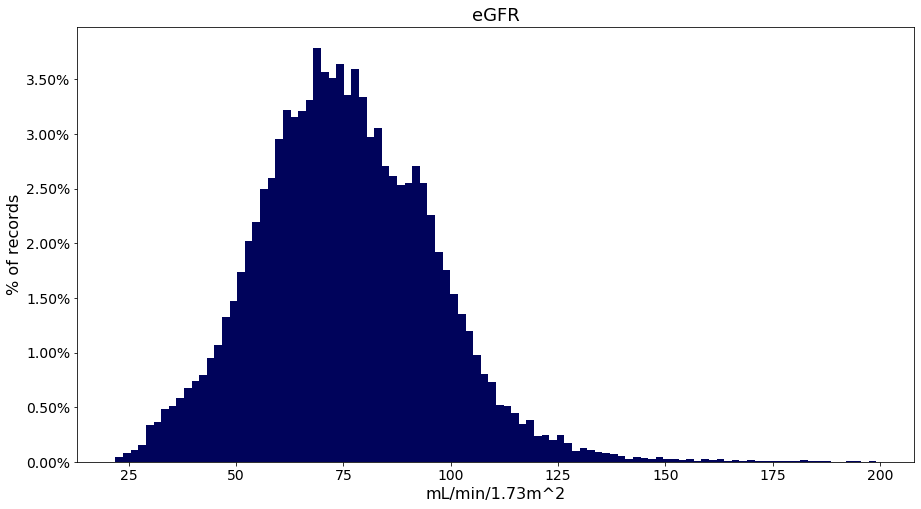

In [511]:
plt.figure(figsize = (15,8))
plt.hist(egfr_spec['egfr'], bins = 100, weights= np.ones_like(egfr_spec.index) / len(egfr_spec.index))
plt.title('eGFR', size = 18)
plt.xlabel('mL/min/1.73m^2', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../primary_care/eGFR.png')
plt.show()

# HbA1c

In [547]:
hba1c = pri[pri['read_2'].isin(biomarker_codes['Hba1c']['read2'])| pri['read_3'].isin(biomarker_codes['Hba1c']['read3'])]

In [548]:
hba1c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 6121 to 4656678
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1498 non-null   int64 
 1   eid            1498 non-null   int64 
 2   data_provider  1498 non-null   int64 
 3   event_dt       1498 non-null   object
 4   read_2         1467 non-null   object
 5   read_3         31 non-null     object
 6   value1         1296 non-null   object
 7   value2         68 non-null     object
 8   value3         276 non-null    object
dtypes: int64(3), object(6)
memory usage: 117.0+ KB


In [549]:
hba1c.value3.unique()

array([nan, 'MEA001', 'MEA215', '%', 'Unknown', 'HbA1c', '%total Hb',
       'MEA097', 'MEA000', 'mmol/mol', 'mol/l', '% total Hb'],
      dtype=object)

6.5% or higher

% to mmol/mol: https://diabetessociety.com.au/documents/HbA1cConversionTable.pdf


In [550]:
hba1c['value'] = hba1c.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [551]:
hba1c['value'] = hba1c['value'].map(lambda x: round(float(x[0]),1) if len(x) > 0 else np.nan)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## baseline

In [552]:
hba1c['event_dt'] = pd.to_datetime(hba1c['event_dt'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [553]:
new_hba1c = pd.merge(hba1c, first_event, how = 'left', on = 'eid')

In [554]:
new_hba1c['before_event'] = new_hba1c['event_dt'] < new_hba1c['first_record_d']

In [555]:
new_hba1c['t_before_event'] = new_hba1c['first_record_d'] - new_hba1c['event_dt']

In [556]:
new_hba1c.head()

,index,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,first_record_d,before_event,t_before_event
0,238194,1009468,1,2008-10-10,42W4.,NaN,6.200,NaN,NaN,6.2,1973-01-06,False,-13061 days
1,238405,1009468,1,2013-01-30,42W4.,NaN,5.800,NaN,NaN,5.8,1973-01-06,False,-14634 days
2,238471,1009468,1,2013-09-09,42W4.,NaN,6.200,NaN,NaN,6.2,1973-01-06,False,-14856 days
3,238545,1009468,1,2015-10-04,42W4.,NaN,6.400,NaN,NaN,6.4,1973-01-06,False,-15611 days
4,238587,1009468,1,2015-04-08,42W4.,NaN,6.400,NaN,NaN,6.4,1973-01-06,False,-15432 days


In [557]:
hba1c_pri_baseline = new_hba1c[new_hba1c['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [558]:
hba1c_pri_baseline_min = hba1c_pri_baseline.loc[hba1c_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [561]:
hba1c_pri_baseline_min['value3'].value_counts()

%          12
MEA001      5
MEA000      2
HbA1c       2
MEA097      1
Unknown     1
Name: value3, dtype: int64

In [283]:
replacehb_dict= {
    '%total Hb': '%',
    '% total Hb': '%', 
    '%Total Hb': '%'
    }

In [560]:
hba1c_pri_baseline_min['value3'] = hba1c_pri_baseline_min['value3'].replace('%total Hb', '%')

## Creating new dataframes for plotting individual SI units

In [562]:
hba1c_pri_baseline_norm = hba1c_pri_baseline_min[hba1c_pri_baseline_min['value3'] == "%"].reset_index().drop('index', axis = 1)

In [563]:
hba1c_pri_baseline_MEA = hba1c_pri_baseline_min[(hba1c_pri_baseline_min['value3'] == "MEA097") |(hba1c_pri_baseline_min['value3'] == "MEA001") | (hba1c_pri_baseline_min['value3'] == "MEA000")].reset_index().drop('index', axis = 1)

In [564]:
hba1c_pri_baseline_unk = hba1c_pri_baseline_min[(hba1c_pri_baseline_min['value3'] == "Unknown") | (hba1c_pri_baseline_min['value3'].isnull() == True)].reset_index().drop('index', axis = 1)

## Plotting the SI units
### % 

In [565]:
hba1c_temp1 = {
    'count': hba1c_pri_baseline_norm.shape[0],
    'mean': hba1c_pri_baseline_norm['value'].mean(),
    'median': hba1c_pri_baseline_norm['value'].median(),
    'stdev': hba1c_pri_baseline_norm['value'].std(),
    'min': hba1c_pri_baseline_norm['value'].min(),
    'max': hba1c_pri_baseline_norm['value'].max(),
    'IQR': str(round(hba1c_pri_baseline_norm['value'].quantile(q=0.75)-hba1c_pri_baseline_norm['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(hba1c_pri_baseline_norm['value'], 'norm')[1]
}

hba1c_t1 = pd.DataFrame(hba1c_temp1, index=['values']).T

hba1c_t1

,values
count,12
mean,7.475
median,6.95
stdev,1.94708
min,5.4
max,12.2
IQR,1.75
Kolmogorov-Smirnov,3.74593e-90


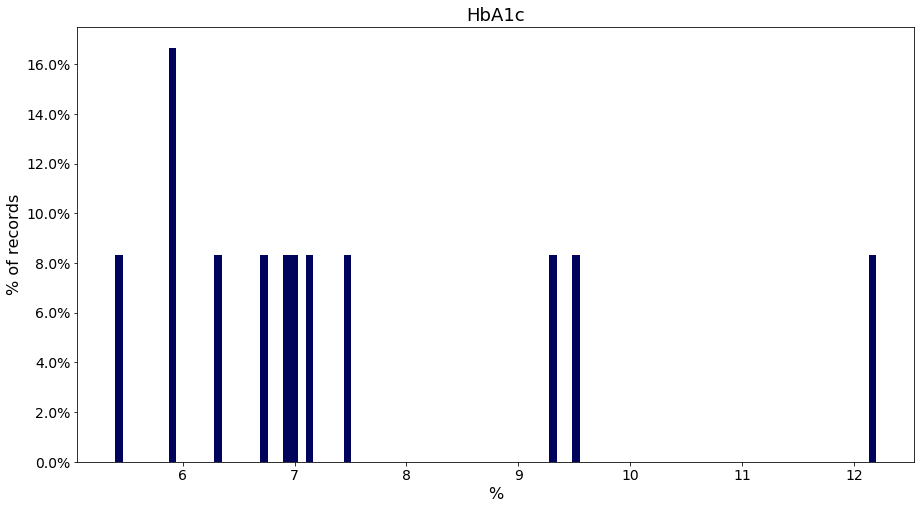

In [566]:
plt.figure(figsize = (15,8))
plt.hist(hba1c_pri_baseline_norm['value'], bins = 100, weights= (np.ones(hba1c_pri_baseline_norm.shape[0]) / hba1c_pri_baseline_norm.shape[0]))
plt.title('HbA1c', size = 18)
plt.xlabel('%', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/hba1c_pri.png')
plt.show()

### MEA

In [567]:
hba1c_temp2 = {
    'count': hba1c_pri_baseline_MEA.shape[0],
    'mean': hba1c_pri_baseline_MEA['value'].mean(),
    'median': hba1c_pri_baseline_MEA['value'].median(),
    'stdev': hba1c_pri_baseline_MEA['value'].std(),
    'min': hba1c_pri_baseline_MEA['value'].min(),
    'max': hba1c_pri_baseline_MEA['value'].max(),
    'IQR': str(round(hba1c_pri_baseline_MEA['value'].quantile(q=0.75)-hba1c_pri_baseline_MEA['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(hba1c_pri_baseline_MEA['value'], 'norm')[1]
}

hba1c_t2 = pd.DataFrame(hba1c_temp2, index=['values']).T

hba1c_t2

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,8
mean,5.83333
median,5.65
stdev,0.488535
min,5.4
max,6.7
IQR,0.47
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


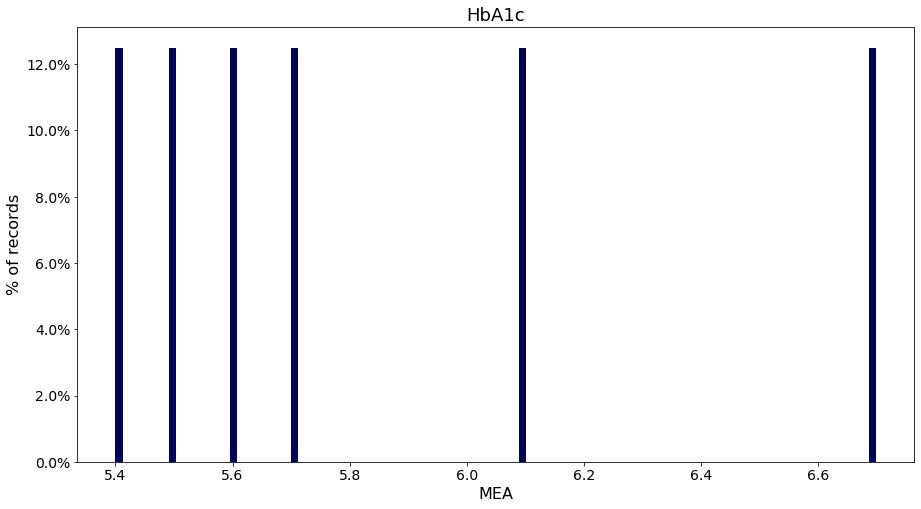

In [568]:
plt.figure(figsize = (15,8))
plt.hist(hba1c_pri_baseline_MEA['value'], bins = 100, weights= (np.ones(hba1c_pri_baseline_MEA.shape[0]) / hba1c_pri_baseline_MEA.shape[0]))
plt.title('HbA1c', size = 18)
plt.xlabel('MEA', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/hba1c_pri_mea.png')
plt.show()

### Unknown

In [569]:
hba1c_temp3 = {
    'count': hba1c_pri_baseline_unk.shape[0],
    'mean': hba1c_pri_baseline_unk['value'].mean(),
    'median': hba1c_pri_baseline_unk['value'].median(),
    'stdev': hba1c_pri_baseline_unk['value'].std(),
    'min': hba1c_pri_baseline_unk['value'].min(),
    'max': hba1c_pri_baseline_unk['value'].max(),
    'IQR': str(round(hba1c_pri_baseline_unk['value'].quantile(q=0.75)-hba1c_pri_baseline_unk['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(hba1c_pri_baseline_unk['value'], 'norm')[1]
}

hba1c_t3 = pd.DataFrame(hba1c_temp3, index=['values']).T

hba1c_t3

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,65
mean,8.71667
median,6.1
stdev,11.0294
min,4.8
max,78
IQR,1.72
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


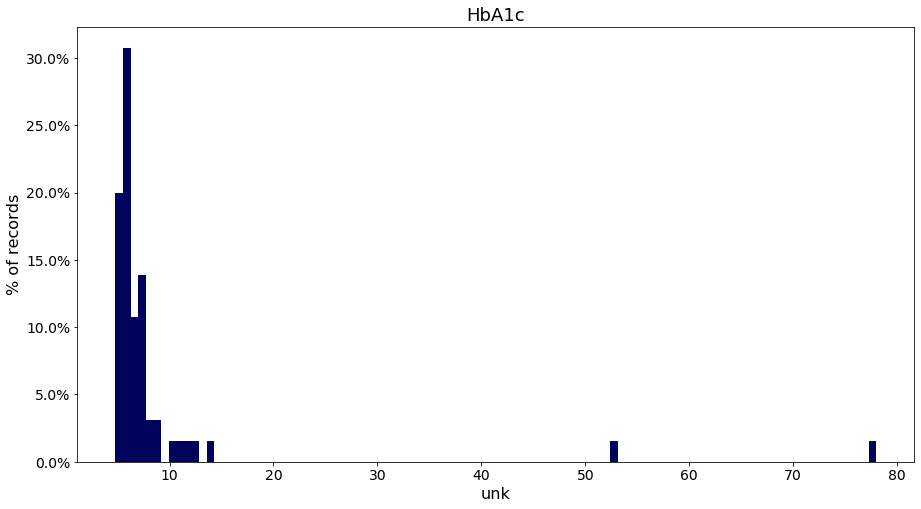

In [570]:
plt.figure(figsize = (15,8))
plt.hist(hba1c_pri_baseline_unk['value'], bins = 100, weights= (np.ones(hba1c_pri_baseline_unk.shape[0]) / hba1c_pri_baseline_unk.shape[0]))
plt.title('HbA1c', size = 18)
plt.xlabel('unk', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/hba1c_pri_unk.png')
plt.show()

## Secondary care

In [571]:
sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       5541 non-null   int64  
 1   eid         5541 non-null   int64  
 2   LDL1        5177 non-null   float64
 3   LDL2        126 non-null    float64
 4   LDL1date    5211 non-null   object 
 5   LDL2date    133 non-null    object 
 6   HDL1        4749 non-null   float64
 7   HDL2        107 non-null    float64
 8   HDL1date    5203 non-null   object 
 9   HDL2date    133 non-null    object 
 10  Creat1      5180 non-null   float64
 11  Creat2      106 non-null    float64
 12  Creat1date  5334 non-null   object 
 13  Creat2date  108 non-null    object 
 14  hba1c1      4756 non-null   float64
 15  hba1c2      107 non-null    float64
 16  hba1c1date  5211 non-null   object 
 17  hba1c2date  133 non-null    object 
 18  gluc1       5168 non-null   float64
 19  gluc2       126 non-null   

In [572]:
hba1c1 = sec[['eid', 'hba1c1', 'hba1c1date']]
hba1c2 = sec[['eid', 'hba1c2', 'hba1c2date']]

hba1c1.dropna(axis = 0, inplace = True)
hba1c2.dropna(axis = 0, inplace = True)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [573]:
hba1c1['hba1c1'] = ((hba1c1['hba1c1']/10.929) + 2.15)
hba1c2['hba1c2'] = ((hba1c2['hba1c2']/10.929) + 2.15)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [574]:
hba1c1['hba1c1date'] = pd.to_datetime(hba1c1['hba1c1date'])
hba1c2['hba1c2date'] = pd.to_datetime(hba1c2['hba1c2date'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [575]:
hba1c1.columns = ['eid', 'hba1c', 'date']
hba1c2.columns = ['eid', 'hba1c', 'date']

In [576]:
hba1c1 = hba1c1.append(hba1c2)

### creating secondary care baseline

In [577]:
hba1c_sec = pd.merge(hba1c1, first_event, on = 'eid', how = 'left')

In [578]:
hba1c_sec['before_event'] = hba1c_sec['date'] < hba1c_sec['first_record_d']

In [579]:
hba1c_sec['t_before_event'] = hba1c_sec['first_record_d'] - hba1c_sec['date']

In [580]:
hba1c_sec_baseline = hba1c_sec[hba1c_sec['t_before_event'] >= timedelta(days= 0)].reset_index().drop('index', axis =1)

In [581]:
hba1c_sec_baseline_min = hba1c_sec_baseline.loc[hba1c_sec_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [582]:
hba1c_sec_baseline_min['SI'] = '%'

### Plotting

In [583]:
hba1c_temp4 = {
    'count': hba1c_sec_baseline_min.hba1c.count(),
    'mean': hba1c_sec_baseline_min.hba1c.mean(),
    'median': hba1c_sec_baseline_min.hba1c.median(),
    'stdev': hba1c_sec_baseline_min.hba1c.std(),
    'min': hba1c_sec_baseline_min.hba1c.min(),
    'max': hba1c_sec_baseline_min.hba1c.max(),
    'IQR': str(round(hba1c_sec_baseline_min['hba1c'].quantile(q=0.75)-hba1c_sec_baseline_min['hba1c'].quantile(q=0.25), 2)),
    'Shapiro-Wilk P': stats.shapiro(hba1c_sec_baseline_min.hba1c)[1]
}

hba1c_t5 = pd.DataFrame(hba1c_temp4, index=['values']).T

hba1c_t5

,values
count,24
mean,2.28349
median,2.28267
stdev,0.0299297
min,2.23143
max,2.3534
IQR,0.04
Shapiro-Wilk P,0.657976


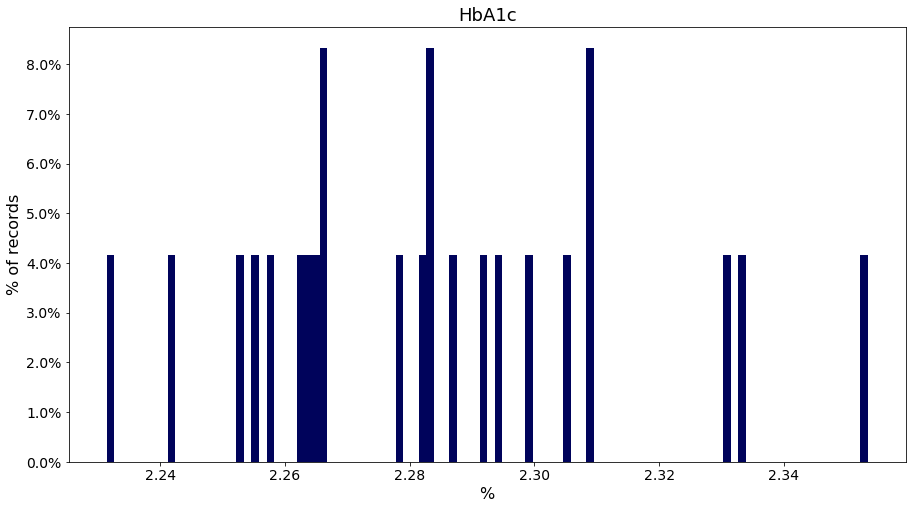

In [584]:
plt.figure(figsize = (15,8))
plt.hist(hba1c_sec_baseline_min['hba1c'], bins = 100, weights= np.ones(hba1c_sec_baseline_min.shape[0]) / hba1c_sec_baseline_min.shape[0])
plt.title('HbA1c', size = 18)
plt.xlabel('%', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/hba1c_sec_baseline.png')
plt.show()

# glucose

In [585]:
glucose = pri[pri['read_2'].isin(biomarker_codes['Glucose']['read2'])| pri['read_3'].isin(biomarker_codes['Glucose']['read3'])]

In [586]:
glucose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10957 entries, 186 to 4704925
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          10957 non-null  int64 
 1   eid            10957 non-null  int64 
 2   data_provider  10957 non-null  int64 
 3   event_dt       10957 non-null  object
 4   read_2         3125 non-null   object
 5   read_3         7832 non-null   object
 6   value1         10252 non-null  object
 7   value2         297 non-null    object
 8   value3         462 non-null    object
dtypes: int64(3), object(6)
memory usage: 856.0+ KB


In [587]:
glucose['value3'] = glucose['value3'].replace('mmol/l','mmol/L')

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [588]:
glucose['value3'] = glucose['value3'].replace('m1/min','ml/min')

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [589]:
glucose['value3'] = glucose['value3'].replace('Mmol/L','mmol/L')

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [590]:
glucose_cf = {
    'nmol/l': (lambda x: (x* (10**6)))
}

In [591]:
glucose.describe()

,index,eid,data_provider
count,1.095700e+04,1.095700e+04,10957.000000
mean,6.363726e+07,3.590596e+06,2.939034
std,3.639053e+07,1.479988e+06,0.709251
min,1.060000e+04,1.000421e+06,1.000000
25%,3.219456e+07,2.311749e+06,3.000000
50%,6.523520e+07,3.658990e+06,3.000000
75%,9.588501e+07,4.899379e+06,3.000000
max,1.236039e+08,6.022831e+06,4.000000


In [592]:
glucose['value'] = glucose.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [593]:
glucose['value'] = glucose['value'].map(lambda x: round(float(x[0]),1) if len(x) > 0 else np.nan)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Baseline

In [594]:
new_glucose = pd.merge(glucose, first_event, how = 'left', on = 'eid')

In [595]:
new_glucose['event_dt'] = pd.to_datetime(new_creat['event_dt'])

In [596]:
new_glucose['before_event'] = new_glucose['event_dt'] < new_glucose['first_record_d']

In [597]:
new_glucose['t_before_event'] = new_glucose['first_record_d'] - new_glucose['event_dt']

In [598]:
gluc_pri_baseline = new_glucose[new_glucose['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [599]:
gluc_pri_baseline_min = gluc_pri_baseline.loc[gluc_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [600]:
gluc_pri_baseline_min.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,first_record_d,before_event,t_before_event
0,1000421,3,2010-03-26,NaN,44g1.,6.500,NaN,NaN,6.5,2010-05-27,True,62 days
1,1001327,3,2011-09-08,NaN,44g1.,5.000,NaN,NaN,5.0,2016-03-28,True,1663 days
2,1002251,3,2011-06-27,NaN,44g1.,6.000,NaN,NaN,6.0,2012-03-27,True,274 days
3,1013502,3,2004-05-03,NaN,44g1.,6.700,NaN,NaN,6.7,2006-01-01,True,608 days
4,1014472,3,2006-08-12,NaN,44g1.,5.400,NaN,NaN,5.4,2006-12-14,True,124 days


In [601]:
gluc_pri_baseline_min.value3.value_counts()

mmol/L    16
MEA096    14
MEA000     6
MEA061     4
Name: value3, dtype: int64

## Creating new dataframes for plotting individual SI units

In [602]:
gluc_pri_baseline_norm = gluc_pri_baseline_min[gluc_pri_baseline_min['value3'] == "mmol/L"].reset_index().drop('index', axis = 1)

In [603]:
gluc_pri_baseline_MEA = gluc_pri_baseline_min[(gluc_pri_baseline_min['value3'] == "MEA096") |(gluc_pri_baseline_min['value3'] == "MEA061") | (hba1c_pri_baseline_min['value3'] == "MEA000")].reset_index().drop('index', axis = 1)

In [604]:
gluc_pri_baseline_unk = gluc_pri_baseline_min[ (gluc_pri_baseline_min['value3'].isnull() == True)].reset_index().drop('index', axis = 1)

## Plotting the SI units
### mmol/L 

In [605]:
gluc_temp1 = {
    'count': gluc_pri_baseline_norm.shape[0],
    'mean': gluc_pri_baseline_norm['value'].mean(),
    'median': gluc_pri_baseline_norm['value'].median(),
    'stdev': gluc_pri_baseline_norm['value'].std(),
    'min': gluc_pri_baseline_norm['value'].min(),
    'max': gluc_pri_baseline_norm['value'].max(),
    'IQR': str(round(gluc_pri_baseline_norm['value'].quantile(q=0.75)-gluc_pri_baseline_norm['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(gluc_pri_baseline_norm['value'], 'norm')[1]
}

gluc_t1 = pd.DataFrame(gluc_temp1, index=['values']).T

gluc_t1

,values
count,16
mean,5.80625
median,5.5
stdev,1.47081
min,4.6
max,10.9
IQR,0.55
Kolmogorov-Smirnov,3.14506e-91


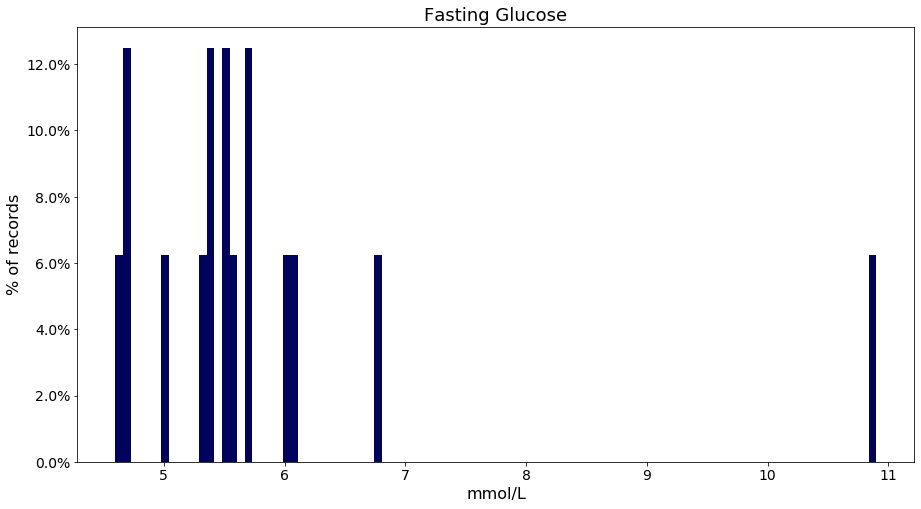

In [606]:
plt.figure(figsize = (15,8))
plt.hist(gluc_pri_baseline_norm['value'], bins = 100, weights= (np.ones(gluc_pri_baseline_norm.shape[0]) / gluc_pri_baseline_norm.shape[0]))
plt.title('Fasting Glucose', size = 18)
plt.xlabel('mmol/L', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/glucose_pri_mmol.png')
plt.show()

### MEA

In [607]:
gluc_temp2 = {
    'count': gluc_pri_baseline_MEA.shape[0],
    'mean': gluc_pri_baseline_MEA['value'].mean(),
    'median': gluc_pri_baseline_MEA['value'].median(),
    'stdev': gluc_pri_baseline_MEA['value'].std(),
    'min': gluc_pri_baseline_MEA['value'].min(),
    'max': gluc_pri_baseline_MEA['value'].max(),
    'IQR': str(round(gluc_pri_baseline_MEA['value'].quantile(q=0.75)-gluc_pri_baseline_MEA['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(gluc_pri_baseline_MEA['value'], 'norm')[1]
}

gluc_t2 = pd.DataFrame(gluc_temp2, index=['values']).T

gluc_t2

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,20
mean,6.25789
median,5.5
stdev,2.62283
min,4.5
max,14.7
IQR,1.1
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


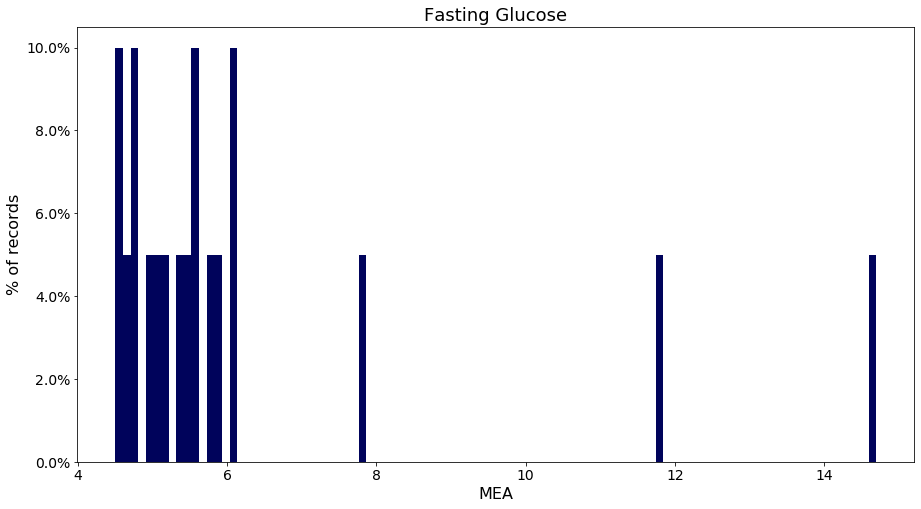

In [608]:
plt.figure(figsize = (15,8))
plt.hist(gluc_pri_baseline_MEA['value'], bins = 100, weights= (np.ones(gluc_pri_baseline_MEA.shape[0]) / gluc_pri_baseline_MEA.shape[0]))
plt.title('Fasting Glucose', size = 18)
plt.xlabel('MEA', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/glucose_pri_mea.png')
plt.show()

### Unknown

In [609]:
gluc_temp3 = {
    'count': gluc_pri_baseline_unk.shape[0],
    'mean': gluc_pri_baseline_unk['value'].mean(),
    'median': gluc_pri_baseline_unk['value'].median(),
    'stdev': gluc_pri_baseline_unk['value'].std(),
    'min': gluc_pri_baseline_unk['value'].min(),
    'max': gluc_pri_baseline_unk['value'].max(),
    'IQR': str(round(gluc_pri_baseline_unk['value'].quantile(q=0.75)-gluc_pri_baseline_unk['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(gluc_pri_baseline_unk['value'], 'norm')[1]
}

gluc_t3 = pd.DataFrame(gluc_temp3, index=['values']).T

gluc_t3

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,842
mean,5.58234
median,5.2
stdev,1.60553
min,2.5
max,24.4
IQR,1.0
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


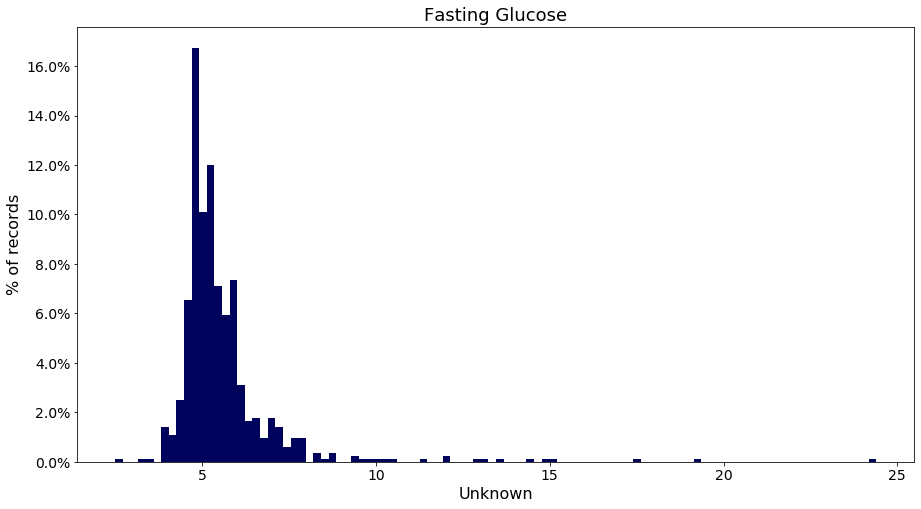

In [610]:
plt.figure(figsize = (15,8))
plt.hist(gluc_pri_baseline_unk['value'], bins = 100, weights= (np.ones(gluc_pri_baseline_unk.shape[0]) / gluc_pri_baseline_unk.shape[0]))
plt.title('Fasting Glucose', size = 18)
plt.xlabel('Unknown', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/glucose_pri_unk.png')
plt.show()

# Postprandial

In [611]:
postprand = pri[pri['read_2'].isin(biomarker_codes['Postprandial']['read2'])| pri['read_3'].isin(biomarker_codes['Postprandial']['read3'])]

In [612]:
postprand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 25861 to 4673093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          219 non-null    int64 
 1   eid            219 non-null    int64 
 2   data_provider  219 non-null    int64 
 3   event_dt       219 non-null    object
 4   read_2         31 non-null     object
 5   read_3         188 non-null    object
 6   value1         216 non-null    object
 7   value2         0 non-null      object
 8   value3         5 non-null      object
dtypes: int64(3), object(6)
memory usage: 17.1+ KB


In [613]:
postprand['value'] = postprand.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [614]:
postprand['value'] = postprand['value'].map(lambda x: round(float(x[0]),1) if len(x) > 0 else np.nan)


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Baseline

In [615]:
pp = pd.merge(postprand, first_event, how = 'left', on = 'eid')

In [616]:
pp['event_dt'] = pd.to_datetime(pp['event_dt'])

In [617]:
pp['before_event'] = pp['event_dt'] < pp['first_record_d']

In [618]:
pp['t_before_event'] = pp['first_record_d'] - pp['event_dt']

In [619]:
pp_pri_baseline = pp[pp['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [620]:
pp_pri_baseline_min = pp_pri_baseline.loc[pp_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [621]:
pp_pri_baseline_min.value3.value_counts()

mmol/L    1
Name: value3, dtype: int64

In [622]:
pp_pri = pp_pri_baseline_min[pp_pri_baseline_min['value3'] != "mmol/L"].reset_index().drop('index', axis = 1)

In [623]:
pp_temp1 = {
    'count': pp_pri.shape[0],
    'mean': pp_pri['value'].mean(),
    'median': pp_pri['value'].median(),
    'stdev': pp_pri['value'].std(),
    'min': pp_pri['value'].min(),
    'max': pp_pri['value'].max(),
    'IQR': str(round(pp_pri['value'].quantile(q=0.75)-pp_pri['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(pp_pri['value'], 'norm')[1]
}

pp_t1 = pd.DataFrame(pp_temp1, index=['values']).T

pp_t1

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,46
mean,7.39556
median,6.6
stdev,3.52639
min,2.5
max,20.1
IQR,3.8
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


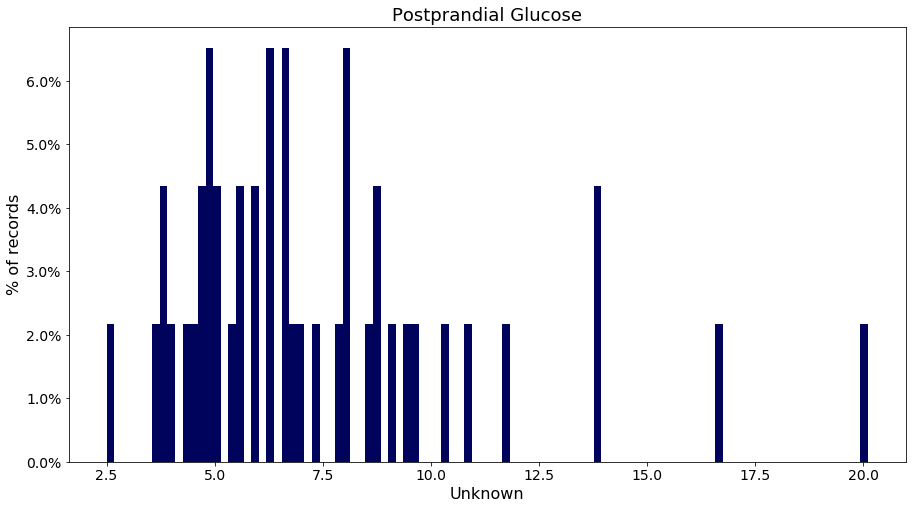

In [624]:
plt.figure(figsize = (15,8))
plt.hist(pp_pri['value'], bins = 100, weights= (np.ones(pp_pri.shape[0]) / pp_pri.shape[0]))
plt.title('Postprandial Glucose', size = 18)
plt.xlabel('Unknown', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/pp_pri.png')
plt.show()

# TSH

In [661]:
tsh = pri[pri['read_2'].isin(biomarker_codes['TSH']['read2'])| pri['read_3'].isin(biomarker_codes['TSH']['read3'])]

In [662]:
tsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17625 entries, 191 to 4704607
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          17625 non-null  int64 
 1   eid            17625 non-null  int64 
 2   data_provider  17625 non-null  int64 
 3   event_dt       17624 non-null  object
 4   read_2         6116 non-null   object
 5   read_3         11509 non-null  object
 6   value1         14023 non-null  object
 7   value2         482 non-null    object
 8   value3         486 non-null    object
dtypes: int64(3), object(6)
memory usage: 1.3+ MB


In [663]:
tsh['value'] = tsh.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [664]:
tsh['value'] = tsh['value'].map(lambda x: round(float(x[0]),1) if len(x) > 0 else np.nan)


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Baseline

In [665]:
new_tsh = pd.merge(tsh, first_event, how = 'left', on = 'eid')

In [666]:
new_tsh['event_dt'] = pd.to_datetime(new_tsh['event_dt'])

In [667]:
new_tsh['before_event'] = new_tsh['event_dt'] < new_tsh['first_record_d']

In [668]:
new_tsh['t_before_event'] = new_tsh['first_record_d'] - new_tsh['event_dt']

In [669]:
tsh_pri_baseline = new_tsh[new_tsh['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [670]:
tsh_pri_baseline_min = tsh_pri_baseline.loc[tsh_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [671]:
tsh_pri_baseline_min

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,first_record_d,before_event,t_before_event
0,1000421,3,2010-03-26,NaN,X77Wg,0.000,NaN,NaN,NaN,2010-05-27,True,62 days
1,1000530,3,2012-02-14,NaN,X77Wg,0.000,NaN,NaN,NaN,2012-03-26,True,41 days
2,1001099,3,2001-12-17,NaN,X77Wg,0.000,NaN,NaN,NaN,2005-10-24,True,1407 days
3,1002251,3,2012-01-17,NaN,X77Wg,0.000,NaN,NaN,NaN,2012-03-27,True,70 days
4,1010923,3,1990-07-13,NaN,X77Wg,0.000,NaN,NaN,NaN,2006-05-09,True,5779 days
...,...,...,...,...,...,...,...,...,...,...,...,...
1608,6015854,3,2001-01-31,NaN,X77Wg,0.000,NaN,NaN,NaN,2004-11-27,True,1396 days
1609,6021143,3,2003-03-02,NaN,XE2wy,2.600,NaN,NaN,2.6,2005-01-20,True,690 days
1610,6021968,4,2014-03-03,442..,NaN,NaN,NaN,NaN,NaN,2015-05-16,True,439 days
1611,6022686,3,2009-05-22,NaN,X77Wg,0.000,NaN,NaN,NaN,2010-12-20,True,577 days


In [672]:
tsh_pri_mea = tsh_pri_baseline_min[(tsh_pri_baseline_min['value3'] == "MEA000") | (tsh_pri_baseline_min['value3'] == "MEA149") | (tsh_pri_baseline_min['value3'] == "MEA160")].reset_index().drop('index', axis = 1)

In [673]:
tsh_pri_unk = tsh_pri_baseline_min[(tsh_pri_baseline_min['value3'].isnull() == True) ].reset_index().drop('index', axis = 1)

### MEA

In [674]:
tsh_temp1 = {
    'count': tsh_pri_mea.shape[0],
    'mean': tsh_pri_mea['value'].mean(),
    'median': tsh_pri_mea['value'].median(),
    'stdev': tsh_pri_mea['value'].std(),
    'min': tsh_pri_mea['value'].min(),
    'max': tsh_pri_mea['value'].max(),
    'IQR': str(round(tsh_pri_mea['value'].quantile(q=0.75)-tsh_pri_mea['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(tsh_pri_mea['value'], 'norm')[1]
}

tsh_t1 = pd.DataFrame(tsh_temp1, index=['values']).T

tsh_t1

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,65
mean,1.4
median,1.45
stdev,0.583095
min,0.4
max,2
IQR,0.6
Kolmogorov-Smirnov,NaN


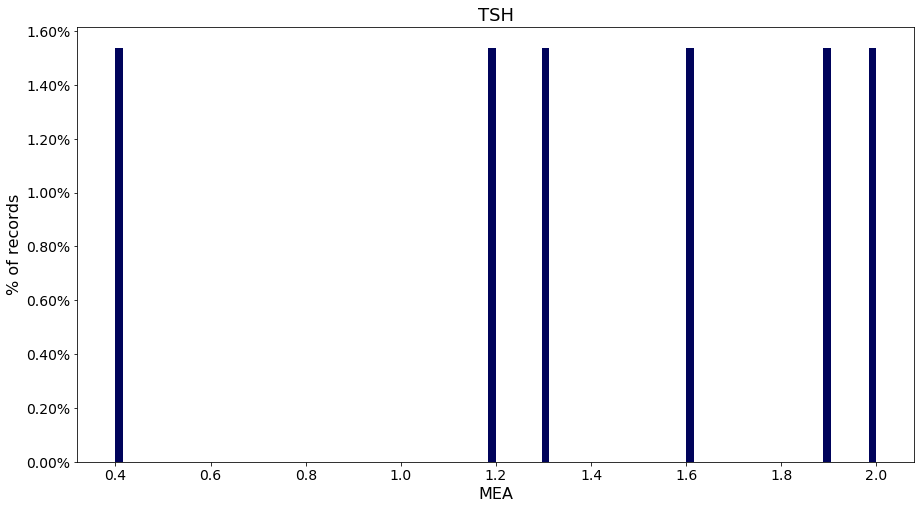

In [676]:
plt.figure(figsize = (15,8))
plt.hist(tsh_pri_mea['value'], bins = 100, weights= (np.ones(tsh_pri_mea.shape[0]) / tsh_pri_mea.shape[0]))
plt.title('TSH', size = 18)
plt.xlabel('MEA', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/tsh_pri_mea.png')
plt.show()

### Unknown

In [677]:
tsh_temp2 = {
    'count': tsh_pri_unk.shape[0],
    'mean': tsh_pri_unk['value'].mean(),
    'median': tsh_pri_unk['value'].median(),
    'stdev': tsh_pri_unk['value'].std(),
    'min': tsh_pri_unk['value'].min(),
    'max': tsh_pri_unk['value'].max(),
    'IQR': str(round(tsh_pri_unk['value'].quantile(q=0.75)-tsh_pri_unk['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(tsh_pri_unk['value'], 'norm')[1]
}

tsh_t2 = pd.DataFrame(tsh_temp2, index=['values']).T

tsh_t2

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,1547
mean,2.30035
median,1.7
stdev,2.43867
min,0
max,19
IQR,1.43
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


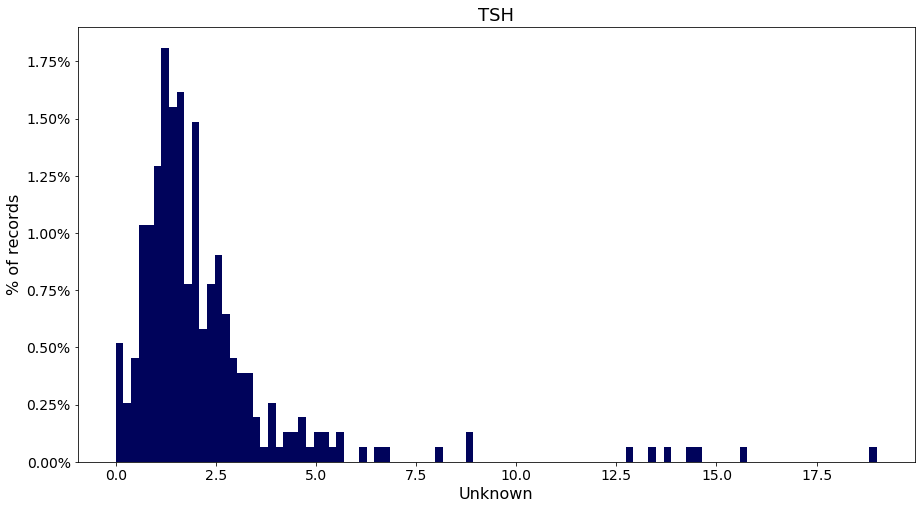

In [678]:
plt.figure(figsize = (15,8))
plt.hist(tsh_pri_unk['value'], bins = 100, weights= (np.ones(tsh_pri_unk.shape[0]) / tsh_pri_unk.shape[0]))
plt.title('TSH', size = 18)
plt.xlabel('Unknown', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/tsh_pri_unk.png')
plt.show()

# TC

In [682]:
tc = pri[pri['read_2'].isin(biomarker_codes['TC']['read2'])| pri['read_3'].isin(biomarker_codes['TC']['read3'])]

In [683]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61552 entries, 37 to 4704938
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          61552 non-null  int64 
 1   eid            61552 non-null  int64 
 2   data_provider  61552 non-null  int64 
 3   event_dt       61548 non-null  object
 4   read_2         18374 non-null  object
 5   read_3         43178 non-null  object
 6   value1         60796 non-null  object
 7   value2         3427 non-null   object
 8   value3         5661 non-null   object
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


In [684]:
tc.value3.unique()

array([nan, 'MEA096', 'MEA000', 'mmol/l', 'mmol/L', 'Unknown', 'MMOL/L',
       'mm01/l'], dtype=object)

In [686]:
tc['value'] = tc.apply(lambda x: list(compress([x['value1'], x['value2'], x['value3']], list(map(verify_float, [x['value1'], x['value2'], x['value3']])))), axis=1)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [687]:
tc['value'] = tc['value'].map(lambda x: round(float(x[0]),1) if len(x) > 0 else np.nan)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## baseline

In [688]:
tc['event_dt'] = pd.to_datetime(tc['event_dt'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [689]:
new_tc = pd.merge(tc, first_event, how = 'left', on = 'eid')

In [690]:
new_tc['before_event'] = new_tc['event_dt'] < new_tc['first_record_d']

In [691]:
new_tc['t_before_event'] = new_tc['first_record_d'] - new_tc['event_dt']

In [692]:
new_tc.head()

,index,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,value,first_record_d,before_event,t_before_event
0,10451,1000421,3,2005-09-12,NaN,XE2eD,5.620,NaN,NaN,5.6,2010-05-27,True,1718 days
1,10498,1000421,3,2007-11-16,NaN,XE2eD,5.420,NaN,NaN,5.4,2010-05-27,True,923 days
2,10611,1000421,3,2010-03-26,NaN,XE2eD,6.100,NaN,NaN,6.1,2010-05-27,True,62 days
3,10778,1000421,3,2011-12-04,NaN,XE2eD,4.300,NaN,NaN,4.3,2010-05-27,False,-556 days
4,10960,1000421,3,2012-07-27,NaN,XE2eD,4.200,NaN,NaN,4.2,2010-05-27,False,-792 days


In [694]:
tc_pri_baseline = new_tc[new_tc['t_before_event'] >= timedelta(days= 0)].drop('index', axis =1).reset_index().drop('index', axis =1)

In [695]:
tc_pri_baseline_min = tc_pri_baseline.loc[tc_pri_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [696]:
tc_pri_baseline_min['value3'].value_counts()

MEA096    105
mmol/L     64
MEA000     22
mmol/l     16
MMOL/L      1
Name: value3, dtype: int64

In [697]:
tc_pri_baseline_min['value3'] = tc_pri_baseline_min['value3'].replace('mmol/l', 'mmol/L')

In [698]:
tc_pri_baseline_min['value3'] = tc_pri_baseline_min['value3'].replace('MMOL/L', 'mmol/L')

## Creating new dataframes for plotting individual SI units

In [699]:
tc_pri_baseline_norm = tc_pri_baseline_min[tc_pri_baseline_min['value3'] == "mmol/L"].reset_index().drop('index', axis = 1)

In [701]:
tc_pri_baseline_MEA = tc_pri_baseline_min[(tc_pri_baseline_min['value3'] == "MEA096") |(tc_pri_baseline_min['value3'] == "MEA000") ].reset_index().drop('index', axis = 1)

In [702]:
tc_pri_baseline_unk = tc_pri_baseline_min[(tc_pri_baseline_min['value3'] == "Unknown") | (tc_pri_baseline_min['value3'].isnull() == True)].reset_index().drop('index', axis = 1)

In [713]:
tc_pri_baseline_unk2 = tc_pri_baseline_min[(tc_pri_baseline_min['value'] <= 50) & (tc_pri_baseline_min['value3'].isnull() == True)].reset_index().drop('index', axis = 1)

## Plotting the SI units
### mmol/L 

In [703]:
tc_temp1 = {
    'count': tc_pri_baseline_norm.shape[0],
    'mean': tc_pri_baseline_norm['value'].mean(),
    'median': tc_pri_baseline_norm['value'].median(),
    'stdev': tc_pri_baseline_norm['value'].std(),
    'min': tc_pri_baseline_norm['value'].min(),
    'max': tc_pri_baseline_norm['value'].max(),
    'IQR': str(round(tc_pri_baseline_norm['value'].quantile(q=0.75)-tc_pri_baseline_norm['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(tc_pri_baseline_norm['value'], 'norm')[1]
}

tc_t1 = pd.DataFrame(tc_temp1, index=['values']).T

tc_t1

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,81
mean,5.17125
median,5.1
stdev,1.29539
min,2.7
max,8.1
IQR,1.75
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


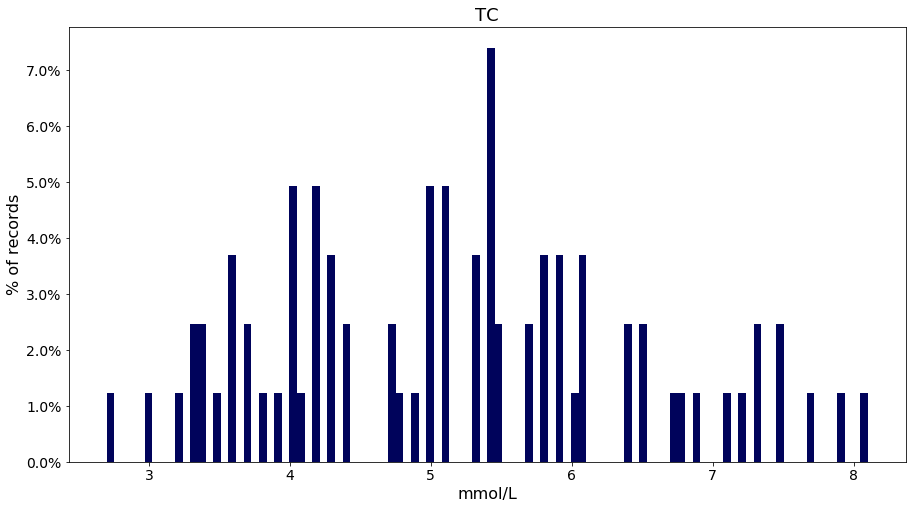

In [704]:
plt.figure(figsize = (15,8))
plt.hist(tc_pri_baseline_norm['value'], bins = 100, weights= (np.ones(tc_pri_baseline_norm.shape[0]) / tc_pri_baseline_norm.shape[0]))
plt.title('TC', size = 18)
plt.xlabel('mmol/L', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/tc_pri_mmol.png')
plt.show()

### MEA

In [705]:
tc_temp2 = {
    'count': tc_pri_baseline_MEA.shape[0],
    'mean': tc_pri_baseline_MEA['value'].mean(),
    'median': tc_pri_baseline_MEA['value'].median(),
    'stdev': tc_pri_baseline_MEA['value'].std(),
    'min': tc_pri_baseline_MEA['value'].min(),
    'max': tc_pri_baseline_MEA['value'].max(),
    'IQR': str(round(tc_pri_baseline_MEA['value'].quantile(q=0.75)-tc_pri_baseline_MEA['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(tc_pri_baseline_MEA['value'], 'norm')[1]
}

tc_t2 = pd.DataFrame(tc_temp2, index=['values']).T

tc_t2

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,127
mean,4.88862
median,4.9
stdev,1.12229
min,2
max,7.9
IQR,1.7
Kolmogorov-Smirnov,NaN


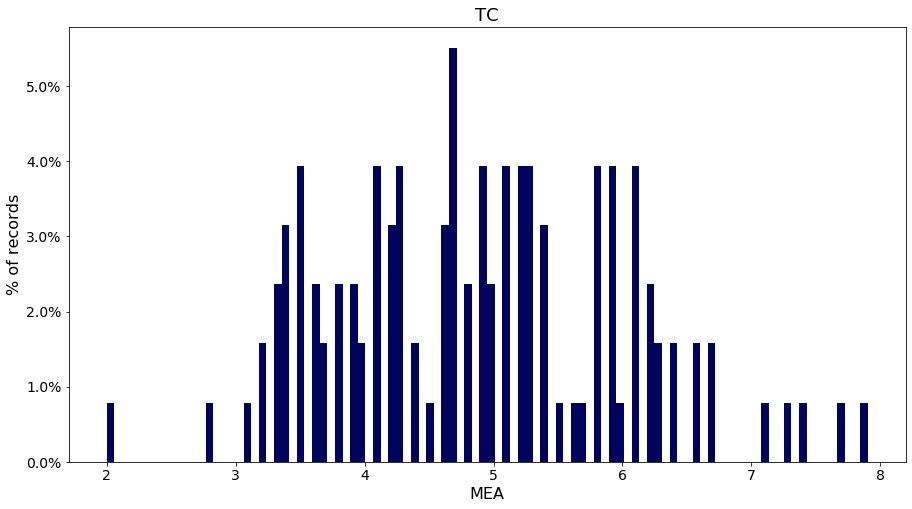

In [707]:
plt.figure(figsize = (15,8))
plt.hist(tc_pri_baseline_MEA['value'], bins = 100, weights= (np.ones(tc_pri_baseline_MEA.shape[0]) / tc_pri_baseline_MEA.shape[0]))
plt.title('TC', size = 18)
plt.xlabel('MEA', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/tc_pri_mea.png')
plt.show()

### Unknown

In [712]:
tc_temp3 = {
    'count': tc_pri_baseline_unk.shape[0],
    'mean': tc_pri_baseline_unk['value'].mean(),
    'median': tc_pri_baseline_unk['value'].median(),
    'stdev': tc_pri_baseline_unk['value'].std(),
    'min': tc_pri_baseline_unk['value'].min(),
    'max': tc_pri_baseline_unk['value'].max(),
    'IQR': str(round(tc_pri_baseline_unk['value'].quantile(q=0.75)-tc_pri_baseline_unk['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(tc_pri_baseline_unk['value'], 'norm')[1]
}

tc_t3 = pd.DataFrame(tc_temp3, index=['values']).T

tc_t3

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,values
count,2432
mean,5.58775
median,5.3
stdev,12.8714
min,1.5
max,618
IQR,1.6
Kolmogorov-Smirnov,NaN


/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


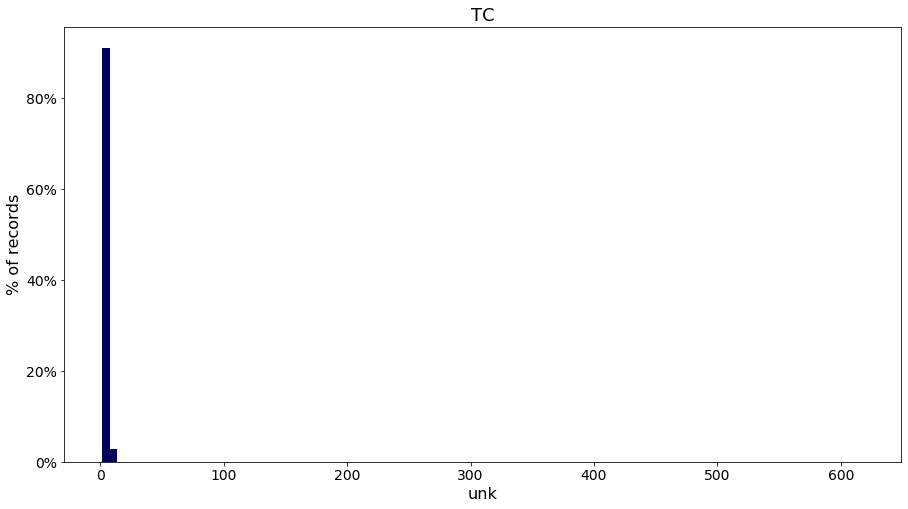

In [717]:
plt.figure(figsize = (15,8))
plt.hist(tc_pri_baseline_unk['value'], bins = 100, weights= (np.ones(tc_pri_baseline_unk.shape[0]) / tc_pri_baseline_unk.shape[0]))
plt.title('TC', size = 18)
plt.xlabel('unk', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/tc_pri_unk.png')
plt.show()

### Unknown 2

In [714]:
tc_temp4 = {
    'count': tc_pri_baseline_unk2.shape[0],
    'mean': tc_pri_baseline_unk2['value'].mean(),
    'median': tc_pri_baseline_unk2['value'].median(),
    'stdev': tc_pri_baseline_unk2['value'].std(),
    'min': tc_pri_baseline_unk2['value'].min(),
    'max': tc_pri_baseline_unk2['value'].max(),
    'IQR': str(round(tc_pri_baseline_unk2['value'].quantile(q=0.75)-tc_pri_baseline_unk2['value'].quantile(q=0.25), 2)),
    'Kolmogorov-Smirnov': stats.kstest(tc_pri_baseline_unk2['value'], 'norm')[1]
}

tc_t4 = pd.DataFrame(tc_temp4, index=['values']).T

tc_t4

,values
count,2285
mean,5.31974
median,5.3
stdev,1.21056
min,1.5
max,11.8
IQR,1.6
Kolmogorov-Smirnov,0


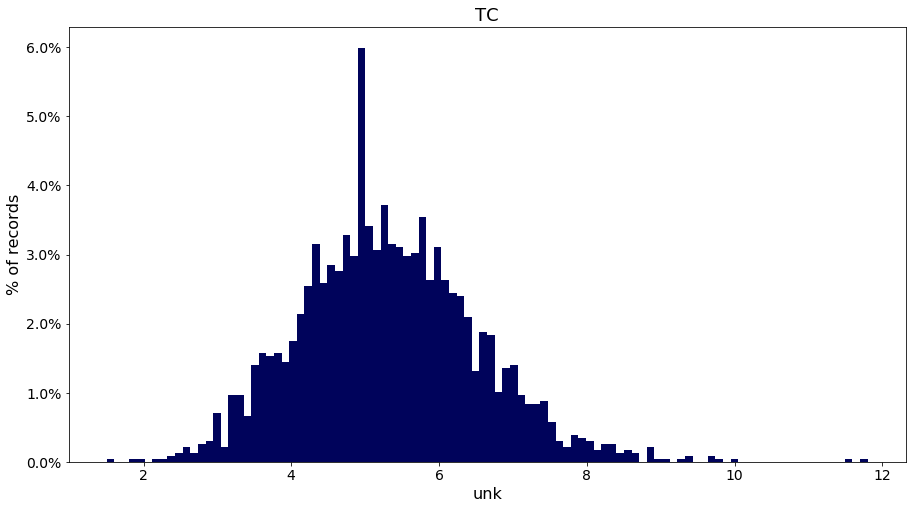

In [716]:
plt.figure(figsize = (15,8))
plt.hist(tc_pri_baseline_unk2['value'], bins = 100, weights= (np.ones(tc_pri_baseline_unk2.shape[0]) / tc_pri_baseline_unk2.shape[0]))
plt.title('TC', size = 18)
plt.xlabel('unk', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/tc_pri_unk2.png')
plt.show()

## Secondary care

In [571]:
sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       5541 non-null   int64  
 1   eid         5541 non-null   int64  
 2   LDL1        5177 non-null   float64
 3   LDL2        126 non-null    float64
 4   LDL1date    5211 non-null   object 
 5   LDL2date    133 non-null    object 
 6   HDL1        4749 non-null   float64
 7   HDL2        107 non-null    float64
 8   HDL1date    5203 non-null   object 
 9   HDL2date    133 non-null    object 
 10  Creat1      5180 non-null   float64
 11  Creat2      106 non-null    float64
 12  Creat1date  5334 non-null   object 
 13  Creat2date  108 non-null    object 
 14  hba1c1      4756 non-null   float64
 15  hba1c2      107 non-null    float64
 16  hba1c1date  5211 non-null   object 
 17  hba1c2date  133 non-null    object 
 18  gluc1       5168 non-null   float64
 19  gluc2       126 non-null   

In [718]:
sec_tc = pd.read_csv('../primary_care/ukb41199.csv', usecols=[0, 6285, 6286, 6287, 6288])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6288) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [721]:
sec_tc

,eid,tc1,tc2,tc1date,tc2date
0,1000019,4.574,NaN,2017-05-26,NaN
1,1000022,6.558,NaN,2016-11-09,NaN
2,1000035,5.216,NaN,2017-03-19,NaN
3,1000046,7.738,NaN,2016-10-19,NaN
4,1000054,5.998,NaN,2016-06-12,NaN
...,...,...,...,...,...
502500,6025018,4.746,NaN,2016-10-06,NaN
502501,6025023,5.315,NaN,2016-12-21,NaN
502502,6025031,5.936,NaN,2016-05-25,NaN
502503,6025040,5.208,NaN,2017-04-02,NaN


In [726]:
sec_tc.columns = ['eid', 'tc1', 'tc2', 'tc1date', 'tc2date']

In [727]:
tc1 = sec_tc[['eid', 'tc1', 'tc1date']]
tc2 = sec_tc[['eid', 'tc2', 'tc2date']]

tc1.dropna(axis = 0, inplace = True)
tc2.dropna(axis = 0, inplace = True)

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [728]:
tc1['tc1date'] = pd.to_datetime(tc1['tc1date'])
tc2['tc2date'] = pd.to_datetime(tc2['tc2date'])

/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelleng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [729]:
tc1.columns = ['eid', 'tc', 'date']
tc2.columns = ['eid', 'tc', 'date']

In [730]:
tc1 = tc1.append(tc2)

### creating secondary care baseline

In [731]:
tc_sec = pd.merge(tc1, first_event, on = 'eid', how = 'left')

In [732]:
tc_sec['before_event'] = tc_sec['date'] < tc_sec['first_record_d']

In [733]:
tc_sec['t_before_event'] = tc_sec['first_record_d'] - tc_sec['date']

In [734]:
tc_sec_baseline = tc_sec[tc_sec['t_before_event'] >= timedelta(days= 0)].reset_index().drop('index', axis =1)

In [736]:
tc_sec_baseline_min = tc_sec_baseline.loc[tc_sec_baseline.groupby('eid').t_before_event.idxmin()].reset_index().drop('index', axis =1 )

In [737]:
tc_sec_baseline_min['SI'] = 'mmol/L'

### Plotting

In [738]:
tc_temp5 = {
    'count': tc_sec_baseline_min.tc.count(),
    'mean': tc_sec_baseline_min.tc.mean(),
    'median': tc_sec_baseline_min.tc.median(),
    'stdev': tc_sec_baseline_min.tc.std(),
    'min': tc_sec_baseline_min.tc.min(),
    'max': tc_sec_baseline_min.tc.max(),
    'IQR': str(round(tc_sec_baseline_min['tc'].quantile(q=0.75)-tc_sec_baseline_min['tc'].quantile(q=0.25), 2)),
    'Shapiro-Wilk P': stats.shapiro(tc_sec_baseline_min.tc)[1]
}

tc_t5 = pd.DataFrame(tc_temp5, index=['values']).T

tc_t5

,values
count,33
mean,5.77476
median,5.872
stdev,1.04139
min,3.842
max,7.649
IQR,1.43
Shapiro-Wilk P,0.551443


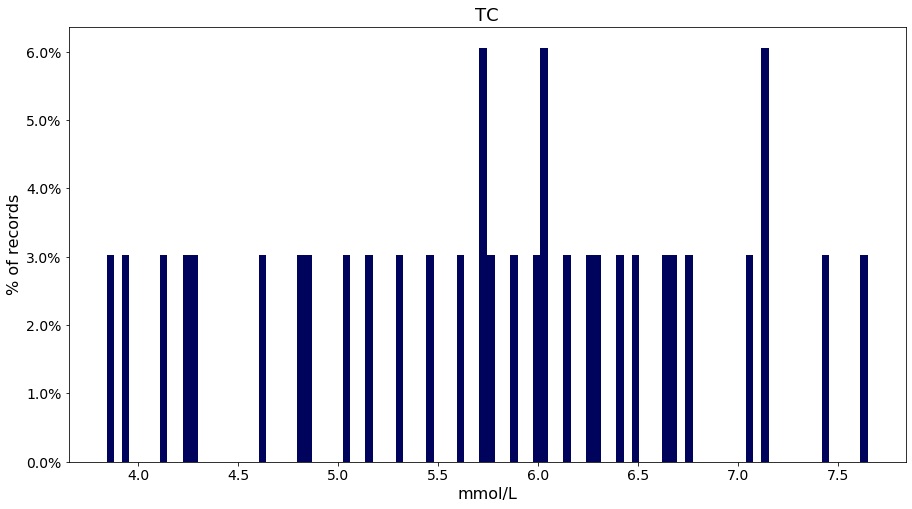

In [739]:
plt.figure(figsize = (15,8))
plt.hist(tc_sec_baseline_min['tc'], bins = 100, weights= np.ones(tc_sec_baseline_min.shape[0]) / tc_sec_baseline_min.shape[0])
plt.title('TC', size = 18)
plt.xlabel('mmol/L', size = 16)
plt.ylabel('% of records', size = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('../Results/Graphs/Exploration/tc_sec_baseline.png')
plt.show()

In [740]:
biomarker_codes

{'LDL': {'read2': ['44P6.', '44PI.', '44dB.', '44d5.', '44D5.', '44R4.'],
  'read3': ['44P6.', 'XaEVs', 'Xalp4', '44R4.']},
 'HDL': {'read2': ['44P5.', '44PB.', '44PC.'],
  'read3': ['44P5.', '44PB', '44PC']},
 'TC': {'read2': ['44OE.', '44P..', '44PJ.', '44PK.'],
  'read3': ['XaIRd', 'XE2eD', 'XaJe9', 'XaLux']},
 'Hba1c': {'read2': ['42W4.'], 'read3': ['XaJPJ']},
 'Creatinine': {'read2': ['44J3.', '44JF.', '4Q40.'],
  'read3': ['XE2q5', 'XaETQ', 'X771N']},
 'Glucose': {'read2': ['44f1.', '44g1.', '44g1.', '44TJ8'],
  'read3': ['44f1.', '44g1.', '44g1.', 'Xabhy']},
 'Postprandial': {'read2': ['44f2.',
   '44f6.',
   '44g2.',
   '44g6.',
   '44T3.',
   '44T3.',
   '44TH.',
   '44U7.'],
  'read3': ['44f2.',
   'XaEOZ',
   '44g2.',
   'XaEOV',
   'XE25X',
   'XE25X',
   'XaENB',
   '44U7.']},
 'TSH': {'read2': ['442J.', '442..'], 'read3': ['X77Wg', 'XE2wy']}}

In [743]:
final_biomarker = pd.DataFrame(biomarker_codes).T

In [744]:
final_biomarker

,read2,read3
LDL,"[44P6., 44PI., 44dB., 44d5., 44D5., 44R4.]","[44P6., XaEVs, Xalp4, 44R4.]"
HDL,"[44P5., 44PB., 44PC.]","[44P5., 44PB, 44PC]"
TC,"[44OE., 44P.., 44PJ., 44PK.]","[XaIRd, XE2eD, XaJe9, XaLux]"
Hba1c,[42W4.],[XaJPJ]
Creatinine,"[44J3., 44JF., 4Q40.]","[XE2q5, XaETQ, X771N]"
Glucose,"[44f1., 44g1., 44g1., 44TJ8]","[44f1., 44g1., 44g1., Xabhy]"
Postprandial,"[44f2., 44f6., 44g2., 44g6., 44T3., 44T3., 44T...","[44f2., XaEOZ, 44g2., XaEOV, XE25X, XE25X, XaE..."
TSH,"[442J., 442..]","[X77Wg, XE2wy]"


In [745]:
final_biomarker.to_csv('../primary_care/11062020_final_biomarker_list.csv')

In [138]:
biomarker_codes_df = pd.DataFrame(biomarker_codes).T

In [134]:
biomarker_codes_df

,read2,read3
LDL,"[44P6., 44PI., 44dB., 44d5., 44D5., 44R4.]","[44P6., XaEVs, Xalp4, 44R4.]"
HDL,"[44P5., 44PB., 44PC.]","[44P5., 44PB, 44PC]"
TC,"[44OE., 44P.., 44PJ., 44PK.]","[XaIRd, XE2eD, XaJe9, XaLux]"
Hba1c,[42W4.],[XaJPJ]
Creatinine,"[44J3., 44JF., 4Q40.]","[XE2q5, XaETQ, X771N]"
Glucose,"[44f1., 44g1., 44g1., 44TJ8]","[44f1., 44g1., 44g1., Xabhy]"
Postprandial,"[44f2., 44f6., 44g2., 44g6., 44T3., 44T3., 44T...","[44f2., XaEOZ, 44g2., XaEOV, XE25X, XE25X, XaE..."
TSH,"[442J., 442..]","[X77Wg, XE2wy]"
SBP,"[246Y., 246D., 246E., 246L., 246d., 246Q.]","[Xalwj, XaKFx, XaKjF, XaJ2E, XaF4L, XaF4O, XaF..."
DBP,"[246A., 246P., 246R., 246X., 246c.]","[Xalwk, XaF4S, XaKFw, XaKjG, XaJ2F, XaF4a, XaF..."


In [136]:
biomarker_codes_df.explode(('read2', 'read3'))

KeyError: ('read2', 'read3')